# Statistical analysis of a Virtual Flow Meter

This notebook is the skeleton for this paper: https://www.onepetro.org/conference-paper/SPE-191962-MS which I presented at the SPE Conference in Australia 2018. The main idea is to see of there is a statistically and practially important difference between the flow estimates from a soft-sensing system when the measurements which the system relies on are under degradation conditions. The system monited by a soft-sensor is a subsea well whoen below.

In [1]:
from IPython.display import Image, display
display(Image(filename='img/Well.jpg', width=600, height=600, embed=True))

The soft-sensing system called Virtual Flow Meter is constructed using OLGA software, OPC software (Matrikon) and Matlab where an optimization engine is run. The schematic representation is shown below:

In [2]:
from IPython.display import Image, display
display(Image(filename='img/OPC-VFM.jpg', width=600, height=600, embed=True))

To start the computational procedure, we introduce an initial guess of the flowrate to the multiphase flow solver which computes the associated wellhead temperature and bottomhole pressure. Then, these values go to the optimization solver which computes the finite difference gradients and iteratively changes the flowrate value until the minimum of the cost function is reached

We perform statistical analysis of various cases when the measurements used in the soft-sensing system are degraded, such that it is corrupted bu different level of measurement drift and noise. For the cases, please, see the paper. 

To perform staistical analysis, we propose the following method:

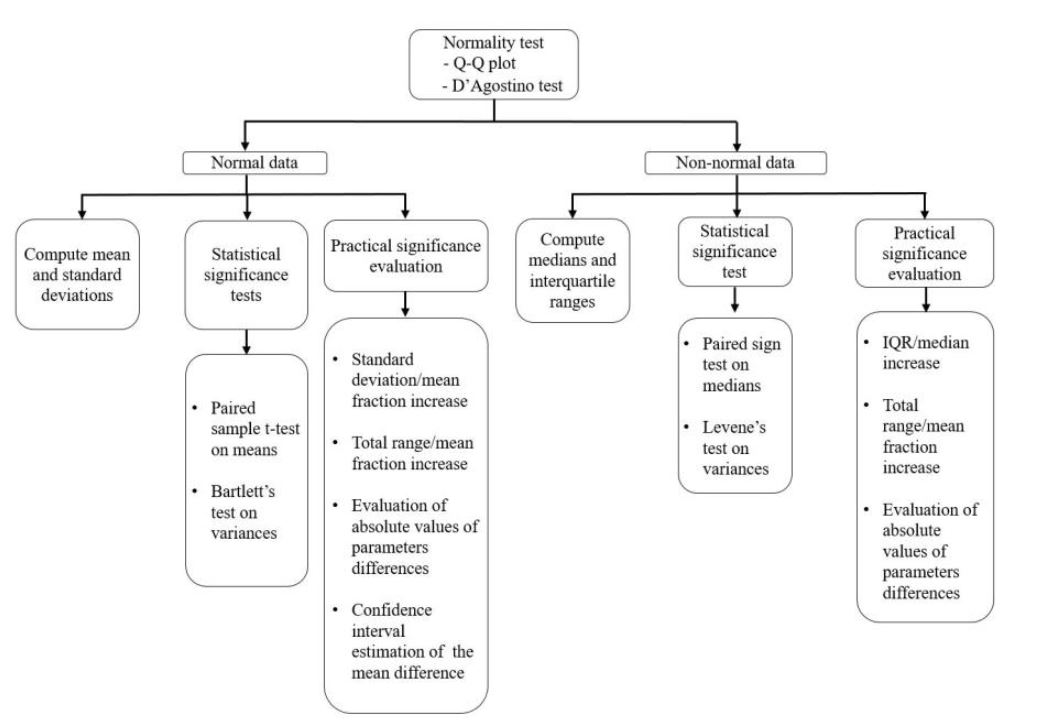

In [3]:
from IPython.display import Image, display
display(Image(filename='img/Statistical_analysis.jpg', width=600, height=600, embed=True))

# Analysis

In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.io
from sklearn.mixture import GaussianMixture
from statsmodels.stats.weightstats import *
from scipy.stats import ttest_rel, bartlett
from statsmodels.stats.descriptivestats import sign_test
from scipy import stats
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\timurb\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['bartlett']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
def dist_plot(plot_data, fig_label, x_lab, y_lab, fig_color, fig_fontsize, tick_color):
    """Creates a distribution plot"""
    sns.distplot(plot_data, bins=10, kde=False, color=fig_color, label=fig_label)
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(fontsize=fig_fontsize, color=tick_color)
    plt.xlabel(x_lab, fontsize=fig_fontsize, color=tick_color)
    plt.yticks(fontsize=fig_fontsize, color=tick_color)
    plt.ylabel(y_lab, fontsize=fig_fontsize, color=tick_color)
    plt.legend([fig_label], fontsize=fig_fontsize)

In [6]:
def Q_Q_plot(data_list, fig_label, x_lab, y_lab, fig_fontsize, tick_color):
    """Plots Q-Q plot"""
    stats.probplot(data_list, dist="norm", plot=pylab)
    plt.title('')
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(fontsize=fig_fontsize, color=tick_color)
    plt.xlabel(x_lab, fontsize=fig_fontsize, color=tick_color)
    plt.yticks(fontsize=fig_fontsize, color=tick_color)
    plt.ylabel(y_lab, fontsize=fig_fontsize, color=tick_color)

# Noise degradation

### Data reading

In [7]:
# Data with 0.5% error
data_mat = scipy.io.loadmat('Paper_0_5_percent_42_bar_Normal_dist_200.mat')
data_0_5_bbl = pd.DataFrame(data_mat['oil_rate_bbl'], columns=['oil_rate_bbl'])
data_0_5_gas = pd.DataFrame(data_mat['gas_rate'], columns=['gas_rate'])

# Data with 1% error
data_mat = scipy.io.loadmat('Paper_1_percent_42_bar_Normal_dist_200.mat')
data_1_bbl = pd.DataFrame(data_mat['oil_rate_bbl'], columns=['oil_rate_bbl'])
data_1_gas = pd.DataFrame(data_mat['gas_rate'], columns=['gas_rate'])

# Data with 1.5% error
data_mat = scipy.io.loadmat('Paper_1_5_percent_42_bar_Normal_dist_200.mat')
data_1_5_bbl = pd.DataFrame(data_mat['oil_rate_bbl'], columns=['oil_rate_bbl'])
data_1_5_gas = pd.DataFrame(data_mat['gas_rate'], columns=['gas_rate'])

### Plotting

C:\Users\timurb\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\timurb\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\timurb\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\timurb\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1.

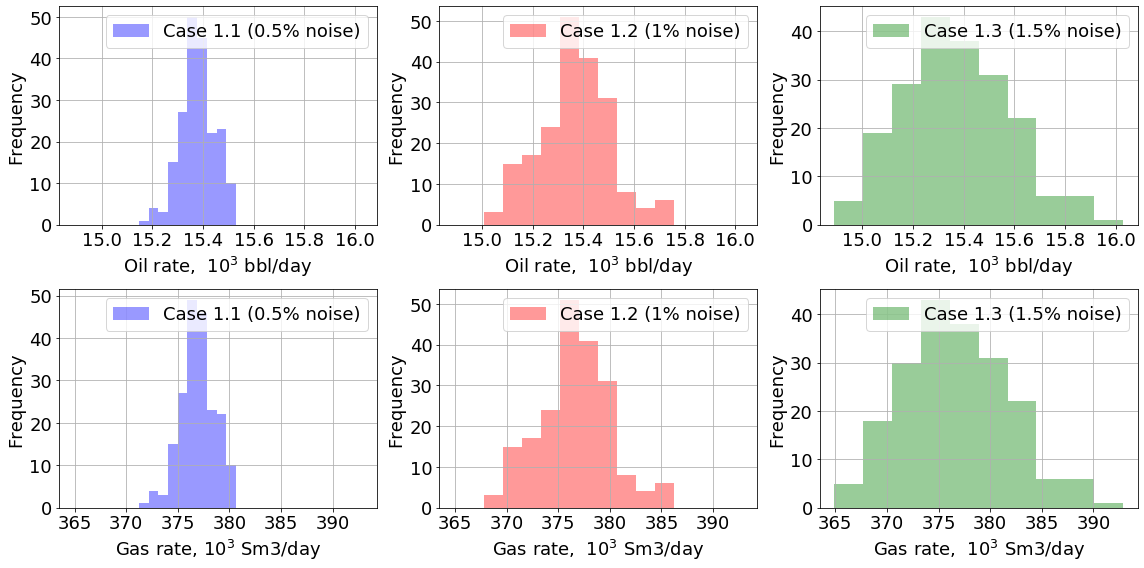

In [8]:
plt.figure(1, figsize = (16, 8))
tick_color_main = 'black'
tick_size = 18
scale = 1e-3

#Oil rates
ax2 = plt.subplot(2, 3, 1)
dist_plot(data_0_5_bbl*scale, 'Case 1.1 (0.5% noise)', 
          'Oil rate,  $10^3$ bbl/day', 
          'Frequency', 'blue', 
          tick_size, tick_color_main)

plt.subplot(2, 3, 2, sharex=ax2)
dist_plot(data_1_bbl*scale, 'Case 1.2 (1% noise)', 
          'Oil rate,  $10^3$ bbl/day', 
          'Frequency', 'red', 
          tick_size, tick_color_main)

plt.subplot(2, 3, 3, sharex=ax2)
dist_plot(data_1_5_bbl*scale, 'Case 1.3 (1.5% noise)', 
          'Oil rate,  $10^3$ bbl/day', 
          'Frequency', 'green', 
          tick_size, tick_color_main)

# Gas rates
ax1 = plt.subplot(2, 3, 4)
dist_plot(data_0_5_gas*scale, 'Case 1.1 (0.5% noise)', 
          'Gas rate, $10^3$ Sm3/day', 
          'Frequency', 'blue', 
          tick_size, tick_color_main)

plt.subplot(2, 3, 5, sharex=ax1)
dist_plot(data_1_gas*scale, 'Case 1.2 (1% noise)', 
          'Gas rate,  $10^3$ Sm3/day', 
          'Frequency', 'red', 
          tick_size, tick_color_main)

plt.subplot(2, 3, 6, sharex=ax1)
dist_plot(data_1_5_gas*scale, 'Case 1.3 (1.5% noise)', 
          'Gas rate,  $10^3$ Sm3/day', 
          'Frequency', 'green', 
          tick_size, tick_color_main)

### Normality tests

In [9]:
#Oil rates in bbl
data_list_0_5_bbl = list(data_0_5_bbl['oil_rate_bbl'])
data_list_1_bbl = list(data_1_bbl['oil_rate_bbl'])
data_list_1_5_bbl = list(data_1_5_bbl['oil_rate_bbl'])

#Gas rates
data_list_0_5_gas = list(data_0_5_gas['gas_rate'])
data_list_1_gas = list(data_1_gas['gas_rate'])
data_list_1_5_gas = list(data_1_5_gas['gas_rate'])

Text(0.5, 1, 'Case 1.3 (1.5% noise)')

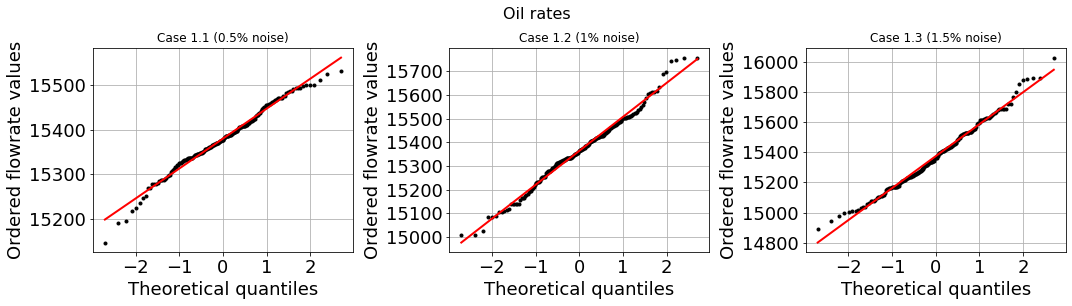

In [10]:
#Oil rates
plt.figure(2, figsize = (15, 4))
tick_color = 'black'
tick_size = 18
plt.suptitle('Oil rates', y=1.05, fontsize=16)

ax1 = plt.subplot(1, 3, 1)
Q_Q_plot(data_list_0_5_bbl, '0.5% error', 
         'Theoretical quantiles', 
         'Ordered flowrate values', 
         tick_size, tick_color_main)
ax1.get_lines()[0].set_marker('o')
ax1.get_lines()[0].set_markeredgecolor('k')
ax1.get_lines()[0].set_markerfacecolor('k')
ax1.get_lines()[1].set_linewidth(2.0)
ax1.get_lines()[0].set_markersize(3)
plt.title('Case 1.1 (0.5% noise)')

ax2 = plt.subplot(1, 3, 2, sharex=ax1)
Q_Q_plot(data_list_1_bbl, '1% error', 
         'Theoretical quantiles', 
         'Ordered flowrate values', 
         tick_size, tick_color_main)
ax2.get_lines()[0].set_marker('o')
ax2.get_lines()[0].set_markeredgecolor('k')
ax2.get_lines()[0].set_markerfacecolor('k')
ax2.get_lines()[1].set_linewidth(2.0)
ax2.get_lines()[0].set_markersize(3)
plt.title('Case 1.2 (1% noise)')

ax3 = plt.subplot(1, 3, 3, sharex = ax1)
Q_Q_plot(data_list_1_5_bbl, '1.5% error', 
         'Theoretical quantiles', 
         'Ordered flowrate values',
         tick_size, tick_color_main)
ax3.get_lines()[0].set_marker('o')
ax3.get_lines()[0].set_markeredgecolor('k')
ax3.get_lines()[0].set_markerfacecolor('k')
ax3.get_lines()[1].set_linewidth(2.0)
ax3.get_lines()[0].set_markersize(3)
plt.title('Case 1.3 (1.5% noise)')

Text(0.5, 1, 'Case 1.3 (1.5% noise)')

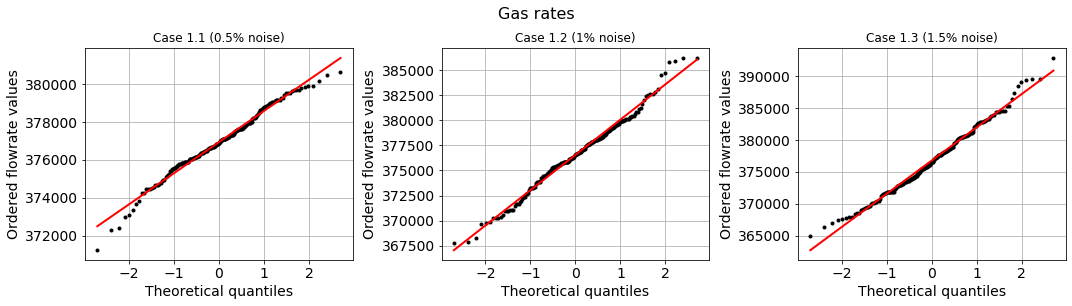

In [11]:
#Gas rates
plt.figure(2, figsize = (15, 4))
tick_color = 'black'
tick_size = 14
plt.suptitle('Gas rates', y=1.05, fontsize=16)

ax1 = plt.subplot(1, 3, 1)
Q_Q_plot(data_list_0_5_gas, '0.5% error', 
         'Theoretical quantiles', 
         'Ordered flowrate values', 
         tick_size, tick_color_main)
ax1.get_lines()[0].set_marker('o')
ax1.get_lines()[0].set_markeredgecolor('k')
ax1.get_lines()[0].set_markerfacecolor('k')
ax1.get_lines()[1].set_linewidth(2.0)
ax1.get_lines()[0].set_markersize(3)
plt.title('Case 1.1 (0.5% noise)')

ax2 = plt.subplot(1, 3, 2, sharex=ax1)
Q_Q_plot(data_list_1_gas, '1% error', 
         'Theoretical quantiles', 
         'Ordered flowrate values', 
         tick_size, tick_color_main)
ax2.get_lines()[0].set_marker('o')
ax2.get_lines()[0].set_markeredgecolor('k')
ax2.get_lines()[0].set_markerfacecolor('k')
ax2.get_lines()[1].set_linewidth(2.0)
ax2.get_lines()[0].set_markersize(3)
plt.title('Case 1.2 (1% noise)')

ax3 = plt.subplot(1, 3, 3, sharex = ax1)
Q_Q_plot(data_list_1_5_gas, '1.5% error', 
         'Theoretical quantiles', 
         'Ordered flowrate values', 
         tick_size, tick_color_main)
ax3.get_lines()[0].set_marker('o')
ax3.get_lines()[0].set_markeredgecolor('k')
ax3.get_lines()[0].set_markerfacecolor('k')
ax3.get_lines()[1].set_linewidth(2.0)
ax3.get_lines()[0].set_markersize(3)
plt.title('Case 1.3 (1.5% noise)')

### D’Agostino criterion

In [12]:
# Oil rate
print ("D’Agostino normality test, W-statistic: %f, p-value: %f" \
       %stats.normaltest(np.array(data_list_0_5_bbl)))
print ("D’Agostino normality test, W-statistic: %f, p-value: %f" \
       %stats.normaltest(np.array(data_list_1_bbl)))
print ("D’Agostino normality test, W-statistic: %f, p-value: %f" \
       %stats.normaltest(np.array(data_list_1_5_bbl)))

D’Agostino normality test, W-statistic: 4.908105, p-value: 0.085945
D’Agostino normality test, W-statistic: 1.448809, p-value: 0.484613
D’Agostino normality test, W-statistic: 3.286350, p-value: 0.193365


In [13]:
#Gas rate
print ("D’Agostino normality test, W-statistic: %f, p-value: %f" \
       %stats.normaltest(np.array(data_list_0_5_gas)))
print ("D’Agostino normality test, W-statistic: %f, p-value: %f" \
       %stats.normaltest(np.array(data_list_1_gas)))
print ("D’Agostino normality test, W-statistic: %f, p-value: %f" \
       %stats.normaltest(np.array(data_list_1_5_gas)))

D’Agostino normality test, W-statistic: 4.969390, p-value: 0.083351
D’Agostino normality test, W-statistic: 1.469393, p-value: 0.479651
D’Agostino normality test, W-statistic: 3.281691, p-value: 0.193816


In [14]:
print ("D’Agostino normality test, W-statistic: %f, p-value: %f" \
       %stats.normaltest(np.array(data_1_bbl - data_0_5_bbl)))
print ("D’Agostino normality test, W-statistic: %f, p-value: %f" \
       %stats.normaltest(np.array(data_1_5_bbl - data_0_5_bbl)))
print (stats.wilcoxon(np.array(data_list_1_bbl) - np.array(data_list_0_5_bbl)))
print (stats.wilcoxon(np.array(data_list_1_5_bbl) - np.array(data_list_0_5_bbl)))

D’Agostino normality test, W-statistic: 0.855734, p-value: 0.651898
D’Agostino normality test, W-statistic: 1.098868, p-value: 0.577276
WilcoxonResult(statistic=8857.0, pvalue=0.14548579514552956)
WilcoxonResult(statistic=9666.0, pvalue=0.639394648019163)


### Compute means, standard deviations and total ranges

__Means__

In [15]:
print ('0.5% oil rate mean is', data_0_5_bbl.mean())
print ('1% oil rate mean is', data_1_bbl.mean())
print ('1.5% oil rate mean is', data_1_5_bbl.mean())

print ('0.5% gas rate mean is', data_0_5_gas.mean())
print ('1% gas rate mean is', data_1_gas.mean())
print ('1.5% gas rate mean is', data_1_5_gas.mean())

0.5% oil rate mean is oil_rate_bbl    15380.015153
dtype: float64
1% oil rate mean is oil_rate_bbl    15364.141688
dtype: float64
1.5% oil rate mean is oil_rate_bbl    15374.912473
dtype: float64
0.5% gas rate mean is gas_rate    376940.799165
dtype: float64
1% gas rate mean is gas_rate    376551.159211
dtype: float64
1.5% gas rate mean is gas_rate    376814.360409
dtype: float64


__Standard deviations__

In [16]:
print ('0.5% oil rate standard deviation is', np.std(data_0_5_bbl))
print ('1% oil rate standard deviation is', np.std(data_1_bbl))
print ('1.5% oil rate standard deviation is', np.std(data_1_5_bbl))

print ('0.5% gas rate standard deviation is', np.std(data_0_5_gas))
print ('1% gas rate standard deviation is', np.std(data_1_gas))
print ('1.5% gas rate standard deviation is', np.std(data_1_5_gas))

0.5% oil rate standard deviation is oil_rate_bbl    66.935509
dtype: float64
1% oil rate standard deviation is oil_rate_bbl    142.461945
dtype: float64
1.5% oil rate standard deviation is oil_rate_bbl    211.320914
dtype: float64
0.5% gas rate standard deviation is gas_rate    1640.136803
dtype: float64
1% gas rate standard deviation is gas_rate    3493.682486
dtype: float64
1.5% gas rate standard deviation is gas_rate    5182.833868
dtype: float64


__Total range__

In [17]:
print ('0.5% oil rate total range is', np.percentile(data_0_5_bbl, 100) - np.percentile(data_0_5_bbl, 0))
print ('1% oil rate total range is', np.percentile(data_1_bbl, 100) - np.percentile(data_1_bbl, 0))
print ('1.5% oil rate total range is', np.percentile(data_1_5_bbl, 100) - np.percentile(data_1_5_bbl, 0))

print ('0.5% gas rate total range is', np.percentile(data_0_5_gas, 100) - np.percentile(data_0_5_gas, 0))
print ('1% gas rate total range is', np.percentile(data_1_gas, 100) - np.percentile(data_1_gas, 0))
print ('1.5% gas rate total range is', np.percentile(data_1_5_gas, 100) - np.percentile(data_1_5_gas, 0))

0.5% oil rate total range is 384.33202898990385
1% oil rate total range is 749.83639967604
1.5% oil rate total range is 1141.1767352691259
0.5% gas rate total range is 9418.938541349664
1% gas rate total range is 18410.002888436662
1.5% gas rate total range is 27990.71749166277


#### Standard deviation plots

C:\Users\timurb\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\timurb\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\timurb\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


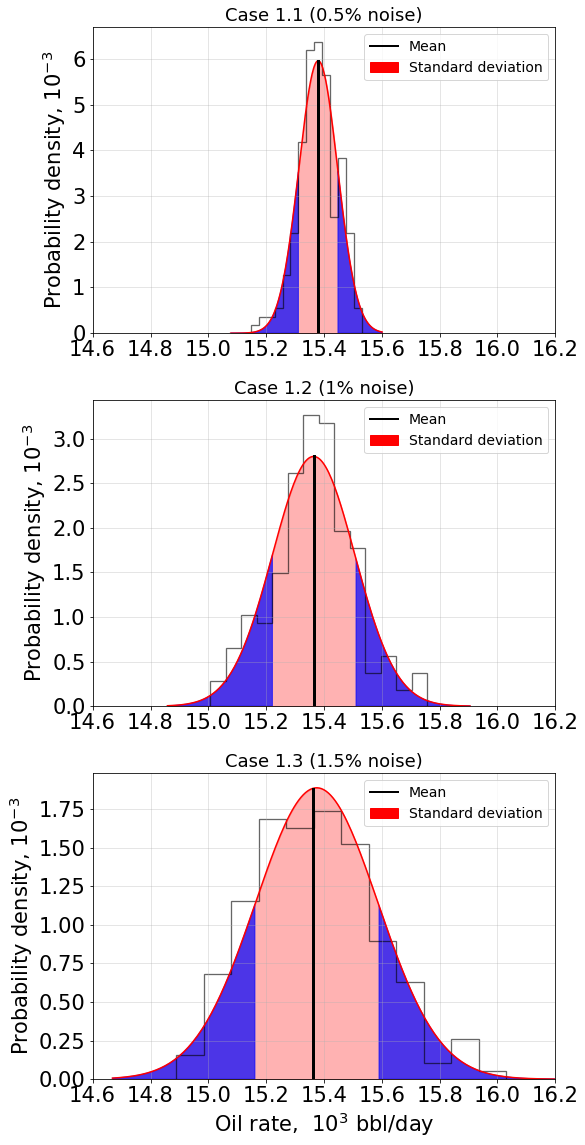

In [18]:
plt.figure(1, figsize = (8, 16))
tick_color_main = 'black'
tick_size = 21
fig_fontsize = 21
scale = 1e-3

# Case 1.1
ax1 = plt.subplot(3, 1, 1)
x2 = np.array([np.mean(data_0_5_bbl)*scale, np.mean(data_0_5_bbl)*scale])
y2 = np.array([0, 5.95])
# Oil rates
sns.distplot(data_0_5_bbl*scale, hist=True, color='red',
             hist_kws={"histtype": "step", "linewidth": 1.3,
                       "alpha": 0.6, "color": "black"},
             kde = False, fit=stats.norm,
             fit_kws={'color': 'red'},ax = ax1)
l1 = ax1.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax1.fill_between(x1,y1, color="red", alpha=0.3)

kde_x, kde_y = ax1.lines[0].get_data()
kde_x = np.round(kde_x, 6)
kde_y = np.round(kde_y, 6)

x0 = round((np.mean(data_0_5_bbl) - np.std(data_0_5_bbl))*scale, 6)['oil_rate_bbl']
x1 = round((np.mean(data_0_5_bbl) + np.std(data_0_5_bbl))*scale, 6)['oil_rate_bbl']

ax1.fill_between(kde_x, kde_y, where=(kde_x<x0) | (kde_x>x1) , 
                 interpolate=True, color='blue', alpha=0.7)

plt.grid(True, alpha=0.4)
plt.tight_layout(5)
plt.xticks(fontsize=fig_fontsize, color=tick_color_main)
plt.xlabel('', fontsize=fig_fontsize, color=tick_color_main)
plt.xlim((14.6, 16.2))
plt.yticks(fontsize = fig_fontsize, color=tick_color_main)
plt.ylabel('Probability density, $10^{-3}$', fontsize=fig_fontsize, 
           color=tick_color_main)
plt.plot(x2, y2, linewidth=3, color='black')
plt.title('Case 1.1 (0.5% noise)', fontsize=18)

legend_elements = [Line2D([0], [0], color='k', lw=2, label='Mean'),
                   Patch(facecolor='r', edgecolor='r',
                         label='Standard deviation')]
plt.legend(handles=legend_elements, fontsize = 14)

#Case 1.2
ax2 = plt.subplot(3, 1, 2)
sns.distplot(data_1_bbl*scale, hist=True, color='red',
             hist_kws={"histtype": "step", "linewidth": 1.3, 
                       "alpha": 0.6, "color": "black"},
             kde=False, fit=stats.norm, 
             fit_kws={'color': 'red'}, ax=ax2)

l1 = ax2.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax2.fill_between(x1,y1, color="red", alpha=0.3)

kde_x, kde_y = ax2.lines[0].get_data()
x0 = round((np.mean(data_1_bbl) - np.std(data_1_bbl))*scale, 6)['oil_rate_bbl']
x1 = round((np.mean(data_1_bbl) + np.std(data_1_bbl))*scale, 6)['oil_rate_bbl']
ax2.fill_between(kde_x, kde_y, where=(kde_x<x0) | (kde_x>x1) , 
                interpolate=True, color='blue', alpha=0.7)
plt.grid(True, alpha=0.4)
plt.xticks(fontsize=fig_fontsize, color=tick_color_main)
plt.xlabel('', fontsize=fig_fontsize, color=tick_color_main)
plt.xlim((14.6, 16.2))
plt.yticks(fontsize = fig_fontsize, color=tick_color_main)
plt.ylabel('Probability density, $10^{-3}$', 
           fontsize=fig_fontsize, color=tick_color_main)

x2 = np.array([np.percentile(data_1_bbl, 50)*scale, 
               np.percentile(data_1_bbl, 50)*scale])
y2 = np.array([0, 2.8])
plt.plot(x2, y2, linewidth=3, color='black')
plt.title('Case 1.2 (1% noise)', fontsize=18)

legend_elements = [Line2D([0], [0], color='k', lw=2, label='Mean'),
                   Patch(facecolor='r', edgecolor='r',label='Standard deviation')]
plt.legend(handles=legend_elements, fontsize=14)

#Case 1.3 
ax3 = plt.subplot(3, 1, 3)
sns.distplot(data_1_5_bbl*scale, hist=True, color='red',
             hist_kws={"histtype": "step", "linewidth": 1.3,
                       "alpha": 0.6, "color": "black"},
             kde=False, fit=stats.norm, 
             fit_kws={'color': 'red'}, ax=ax3)

l1 = ax3.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax3.fill_between(x1,y1, color="red", alpha=0.3)

kde_x, kde_y = ax3.lines[0].get_data()
x0 = round((np.mean(data_1_5_bbl) - np.std(data_1_5_bbl))*scale, 6)['oil_rate_bbl']
x1 = round((np.mean(data_1_5_bbl) + np.std(data_1_5_bbl))*scale, 6)['oil_rate_bbl']
ax3.fill_between(kde_x, kde_y, where=(kde_x<x0) | (kde_x>x1) , 
                interpolate=True, color='blue', alpha=0.7)

plt.grid(True, alpha=0.4)
plt.xticks(fontsize=fig_fontsize, color=tick_color_main)
plt.xlim((14.6, 16.2))
plt.xlabel('Oil rate,  $10^3$ bbl/day', 
           fontsize=fig_fontsize, color=tick_color_main)
plt.yticks(fontsize=fig_fontsize, color=tick_color_main)
plt.ylabel('Probability density, $10^{-3}$', 
           fontsize=fig_fontsize, color=tick_color_main)

x2 = np.array([np.percentile(data_1_5_bbl, 50)*scale, 
               np.percentile(data_1_5_bbl, 50)*scale])
y2 = np.array([0, 1.88])
plt.plot(x2, y2, linewidth=3, color='black')
plt.title('Case 1.3 (1.5% noise)', fontsize=18)

legend_elements = [Line2D([0], [0], color='k', lw=2, label='Mean'),
                   Patch(facecolor='r', edgecolor='r'
                         ,label='Standard deviation')]
plt.legend(handles=legend_elements, fontsize=14)

oil_rate_bbl    1.374453
dtype: float64
oil_rate_bbl    211.320914
dtype: float64


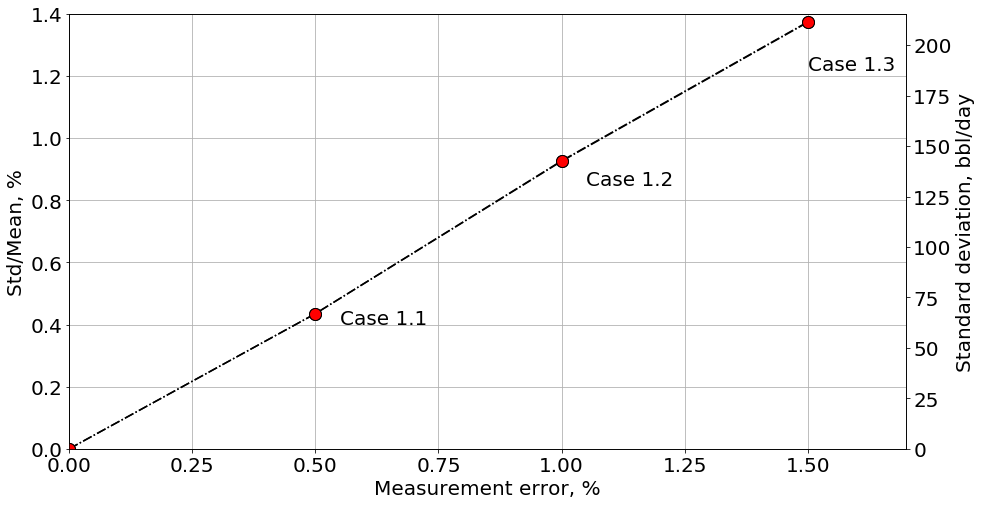

In [19]:
x = [0, 0.5, 1.0, 1.5]
y = [0, np.std(data_0_5_bbl), np.std(data_1_bbl), np.std(data_1_5_bbl)]
y2 = [0, np.std(data_0_5_bbl)*100/ data_0_5_bbl.mean(),
     np.std(data_1_bbl)*100/data_1_bbl.mean(), 
      np.std(data_1_5_bbl)*100/data_1_5_bbl.mean()]
print (np.std(data_1_5_bbl)*100/data_1_5_bbl.mean())
print (np.std(data_1_5_bbl))

fig, ax1 = plt.subplots(figsize=(15,8))
plt.grid(True, which='both')
color = 'black'
fontsize = 20

ax1.set_ylabel('Std/Mean, %', color=color, fontsize=fontsize)
ax1.set_xlabel('Measurement error, %', fontsize=fontsize)
ax1.set_ylim(0, 1.4)
ax1.set_xlim(0, 1.7)
x_major = np.arange(0, 1.75, 0.25)
ax1.set_xticks(x_major)
ax1.plot(x, y2, linestyle='-.', color='k', marker='o', 
         markerfacecolor='r', markersize=12)
ax1.tick_params(axis='x', labelcolor=color, labelsize=fontsize)
ax1.tick_params(axis='y', labelcolor=color, labelsize=fontsize)
ax1.annotate('Case 1.1', xy=(0.5, 0.4), xytext=(0.55, 0.4), fontsize=20)
ax1.annotate('Case 1.2', xy=(1, 0.95), xytext=(1.05, 0.85), fontsize=20)
ax1.annotate('Case 1.3', xy=(1.5, 1.38), xytext=(1.5, 1.22), fontsize=20)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 215.5)
ax2.set_xlabel('Measurement error, %', fontsize=fontsize)
ax2.set_ylabel('Standard deviation, bbl/day', color=color, fontsize=fontsize)
ax2.plot(x, y, linestyle='-.', color='k', marker='o', 
         markerfacecolor='r', markersize=12)
ax2.tick_params(axis='y', labelcolor=color, labelsize=fontsize )
ax2.tick_params(axis='x', labelcolor=color, labelsize=fontsize )

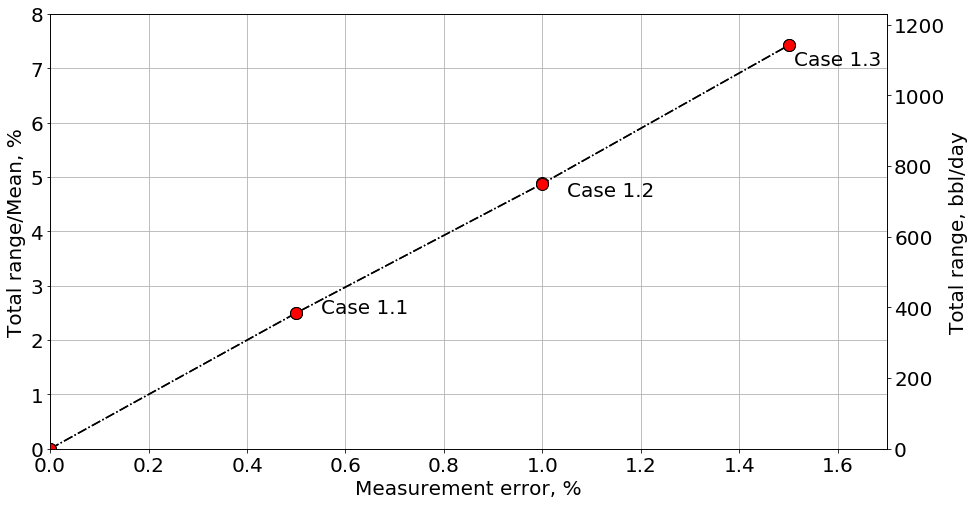

In [20]:
x = [0, 0.5, 1.0, 1.5]

total_0_5 = np.percentile(data_0_5_bbl, 100) - np.percentile(data_0_5_bbl, 0)
total_1 = np.percentile(data_1_bbl, 100) - np.percentile(data_1_bbl, 0)
total_1_5 = np.percentile(data_1_5_bbl, 100) - np.percentile(data_1_5_bbl, 0)

y = [0, total_0_5, total_1, total_1_5]
y2 = [0, total_0_5*100/ data_0_5_bbl.mean(),
     total_1*100/data_1_bbl.mean(), 
      total_1_5*100/data_1_5_bbl.mean()]

fig, ax1 = plt.subplots(figsize=(15,8))
plt.grid(True, which='both')
color = 'black'
fontsize = 20

ax1.set_ylabel('Total range/Mean, %', color=color, fontsize=fontsize)
ax1.set_xlabel('Measurement error, %', fontsize=fontsize)
ax1.set_ylim(0, 8)
ax1.set_xlim(0, 1.7)

ax1.plot(x, y2, linestyle='-.', color='k', marker='o', 
         markerfacecolor='r', markersize=12)
ax1.tick_params(axis='x', labelcolor=color, labelsize=fontsize )
ax1.tick_params(axis='y', labelcolor=color, labelsize=fontsize)
ax1.annotate('Case 1.1', xy=(0.5, 2.5), xytext=(0.55, 2.5), fontsize=20)
ax1.annotate('Case 1.2', xy=(1, 4.9), xytext=(1.05, 4.65), fontsize=20)
ax1.annotate('Case 1.3', xy=(1.5, 7.5), xytext=(1.51, 7.05), fontsize=20)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 1230)
ax2.set_xlabel('Measurement error, %', fontsize=fontsize)
ax2.set_ylabel('Total range, bbl/day', color=color, fontsize=fontsize)
ax2.plot(x, y, linestyle='-.', color='k', marker='o', 
         markerfacecolor='r', markersize=12)
ax2.tick_params(axis='y', labelcolor=color, labelsize=fontsize )
ax2.tick_params(axis='x', labelcolor=color, labelsize=fontsize )

### Means and std comparison

#### Means

In [21]:
print ('Mean difference 1 oil is', data_1_bbl.mean() - data_0_5_bbl.mean())
print ('Mean difference 2 oil is', data_1_5_bbl.mean() - data_0_5_bbl.mean())

print ('Mean difference 1 gas is', data_1_gas.mean() - data_0_5_gas.mean())
print ('Mean difference 2 gas is', data_1_5_gas.mean() - data_0_5_gas.mean())

Mean difference 1 oil is oil_rate_bbl   -15.873466
dtype: float64
Mean difference 2 oil is oil_rate_bbl   -5.10268
dtype: float64
Mean difference 1 gas is gas_rate   -389.639953
dtype: float64
Mean difference 2 gas is gas_rate   -126.438756
dtype: float64


In [22]:
#Oil
print ('t-test on means', ttest_rel(data_1_bbl, data_0_5_bbl))
print ('t-test on means', ttest_rel(data_1_5_bbl, data_0_5_bbl))

print (float(data_1_bbl.mean()) / float(data_0_5_bbl.mean()))
print (float(data_1_5_bbl.mean()) / float(data_0_5_bbl.mean()))

t-test on means Ttest_relResult(statistic=array([-1.40922772]), pvalue=array([0.16032858]))
t-test on means Ttest_relResult(statistic=array([-0.32171704]), pvalue=array([0.74800474]))
0.9989679161081767
0.9996682265689124


In [23]:
#Gas
print ('t-test on means', ttest_rel(data_1_gas, data_0_5_gas))
print ('t-test on means', ttest_rel(data_1_5_gas, data_0_5_gas))

print (float(data_1_gas.mean()) / float(data_0_5_gas.mean()))
print (float(data_1_5_gas.mean()) / float(data_0_5_gas.mean()))

t-test on means Ttest_relResult(statistic=array([-1.41111423]), pvalue=array([0.15977239]))
t-test on means Ttest_relResult(statistic=array([-0.3250833]), pvalue=array([0.74545954]))
0.9989663099509197
0.9996645660108443


#### STDs

In [24]:
#Oil
print ('std ratio is', float(np.std(data_1_bbl)) / np.std(data_0_5_bbl))
print ('std difference is', np.std(data_1_bbl) - np.std(data_0_5_bbl))

print ('std ratio is', float(np.std(data_1_5_bbl)) / np.std(data_0_5_bbl))
print ('std difference is', np.std(data_1_5_bbl) - np.std(data_0_5_bbl))

std ratio is oil_rate_bbl    2.128346
dtype: float64
std difference is oil_rate_bbl    75.526436
dtype: float64
std ratio is oil_rate_bbl    3.157082
dtype: float64
std difference is oil_rate_bbl    144.385405
dtype: float64


In [25]:
#Gas
print ('std ratio is', float(np.std(data_1_gas)) / np.std(data_0_5_gas))
print ('std difference is', np.std(data_1_gas) - np.std(data_0_5_gas))

print ('std ratio is', float(np.std(data_1_5_gas)) / np.std(data_0_5_gas))
print ('std difference is', np.std(data_1_5_gas) - np.std(data_0_5_gas))

std ratio is gas_rate    2.130117
dtype: float64
std difference is gas_rate    1853.545683
dtype: float64
std ratio is gas_rate    3.160001
dtype: float64
std difference is gas_rate    3542.697065
dtype: float64


__Total range__

In [26]:
total_0_5_bbl = np.percentile(data_0_5_bbl, 100) - np.percentile(data_0_5_bbl, 0)
total_1_bbl = np.percentile(data_1_bbl, 100) - np.percentile(data_1_bbl, 0)
total_1_5_bbl = np.percentile(data_1_5_bbl, 100) - np.percentile(data_1_5_bbl, 0)

print ('Total range difference oil 1-0.5 is', total_1_bbl - total_0_5_bbl)
print ('Total range difference oil 1.5-0.5 is', total_1_5_bbl - total_0_5_bbl)

total_0_5_gas = np.percentile(data_0_5_gas, 100) - np.percentile(data_0_5_gas, 0)
total_1_gas = np.percentile(data_1_gas, 100) - np.percentile(data_1_gas, 0)
total_1_5_gas = np.percentile(data_1_5_gas, 100) - np.percentile(data_1_5_gas, 0)

print ('Total range difference gas 1-0.5 is', total_1_gas - total_0_5_gas)
print ('Total range difference gas 1.5-0.5 is', total_1_5_gas - total_0_5_gas)

Total range difference oil 1-0.5 is 365.5043706861361
Total range difference oil 1.5-0.5 is 756.844706279222
Total range difference gas 1-0.5 is 8991.064347086998
Total range difference gas 1.5-0.5 is 18571.778950313106


#### Variance difference

In [33]:
data_1_bbl.values.ravel().shape

(200,)

In [34]:
print (stats.bartlett(data_1_bbl.values.ravel(), data_0_5_bbl.values.ravel()))
print (stats.bartlett(data_1_5_bbl.values.ravel(), data_0_5_bbl.values.ravel()))

print (stats.bartlett(data_1_gas.values.ravel(), data_0_5_gas.values.ravel()))
print (stats.bartlett(data_1_5_gas.values.ravel(), data_0_5_gas.values.ravel()))

BartlettResult(statistic=103.88351480084485, pvalue=2.1456736412825374e-24)
BartlettResult(statistic=219.18932950678786, pvalue=1.3589796334965443e-49)
BartlettResult(statistic=104.09427911443868, pvalue=1.929144449475357e-24)
BartlettResult(statistic=219.48933219431675, pvalue=1.1688905195702958e-49)


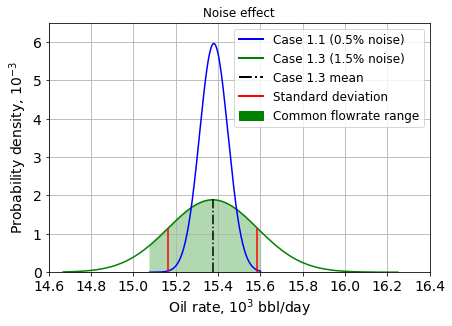

In [35]:
#Oil rates
fig_fontsize = 14
tick_color = 'k'

ax1 = plt.subplot(1, 1, 1)
sns.distplot(data_1_5_bbl*scale, bins=10, hist=False, kde=False, 
             fit=stats.norm, fit_kws={'color': 'green'}, 
             label='Case 1.3', ax=ax1)
plt.grid(True)
plt.tight_layout()
plt.xlim((14.6, 16.4))
plt.ylim((0, 6.5))
plt.xticks(fontsize=fig_fontsize, color=tick_color)
plt.xlabel('Oil rate, $10^3$ bbl/day', 
           fontsize=fig_fontsize, color=tick_color)
plt.yticks(fontsize=fig_fontsize, color=tick_color)
plt.ylabel('Probability density, $10^{-3}$', 
           fontsize=fig_fontsize, color=tick_color)
sns.distplot(data_0_5_bbl*scale, bins=10, hist=False, 
             kde=False, fit=stats.norm, 
             fit_kws={'color': 'blue'}, 
             label='Case 1.1')

l1 = ax1.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax1.fill_between(x1,y1, color="green", alpha=0.3)

kde_x, kde_y = ax1.lines[0].get_data()
x0 = 15.08
x1 = 15.6
plt.fill_between(kde_x, kde_y, where=(kde_x<x0)| (kde_x>x1) , 
              interpolate=True, color='white', alpha=1)

x = [(np.mean(data_1_5_bbl) - np.std(data_1_5_bbl))*scale, 
     (np.mean(data_1_5_bbl) - np.std(data_1_5_bbl))*scale]
x1 = [(np.mean(data_1_5_bbl) + np.std(data_1_5_bbl))*scale, 
      (np.mean(data_1_5_bbl) + np.std(data_1_5_bbl))*scale]
y = [0, 1.13]
y1 = [0, 1.13]
plt.plot(x, y, color='r', label='Standard deviation')
plt.plot(x1, y1, color='r')

x = [np.mean(data_1_5_bbl)*scale, np.mean(data_1_5_bbl)*scale]
y = [0, 1.9]
plt.plot(x, y, linestyle='-.', color='k', label='Case 1.3 mean')

legend_elements = [Line2D([0], [0], color='b', lw=2, label='Case 1.1 (0.5% noise)'),
                   Line2D([0], [0], color='g', lw=2, label='Case 1.3 (1.5% noise)'),
                   Line2D([0], [0], color='k', linestyle='-.', lw=2, label='Case 1.3 mean'),
                   Line2D([0], [0], color='r', lw=2, label='Standard deviation'),
                   Patch(facecolor='g', edgecolor='g',label='Common flowrate range')]

plt.legend(handles=legend_elements, fontsize=12)
plt.title('Noise effect')

plt.show()

# Drift degradation

### Data reading

In [36]:
#No degradation
data_mat = scipy.io.loadmat('Paper_0_5_percent_42_bar_Normal_dist_200.mat')
data_0_5_bbl_no = pd.DataFrame(data_mat['oil_rate_bbl'], columns=['oil_rate_bbl'])
data_0_5_gas_no = pd.DataFrame(data_mat['gas_rate'], columns=['gas_rate'])

#Data with 0.5% error
data_mat = scipy.io.loadmat('Paper_0.5_percent_drift_42_bar_Normal_dist_200.mat')
data_0_5_bbl = pd.DataFrame(data_mat['oil_rate_bbl'], columns=['oil_rate_bbl'])
data_0_5_gas = pd.DataFrame(data_mat['gas_rate'], columns=['gas_rate'])

#Data with 1% error
data_mat = scipy.io.loadmat('Paper_1_percent_drift_42_bar_Normal_dist_200.mat')
data_1_bbl = pd.DataFrame(data_mat['oil_rate_bbl'], columns=['oil_rate_bbl'])
data_1_gas = pd.DataFrame(data_mat['gas_rate'], columns=['gas_rate'])

#Data with 1.5% error
data_mat = scipy.io.loadmat('Paper_1.5_percent_drift_42_bar_Normal_dist_200.mat')
data_1_5_bbl = pd.DataFrame(data_mat['oil_rate_bbl'], columns=['oil_rate_bbl'])
data_1_5_gas = pd.DataFrame(data_mat['gas_rate'], columns=['gas_rate'])

In [37]:
print ('Confidence interval of the mean difference is', \
       DescrStatsW(data_1_bbl.values - data_0_5_bbl.values).tconfint_mean())

Confidence interval of the mean difference is (array([67.99770308]), array([78.92716189]))


### Plotting

C:\Users\timurb\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\timurb\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\timurb\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\timurb\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1.

Text(0.5, 1, 'Case 2.3')

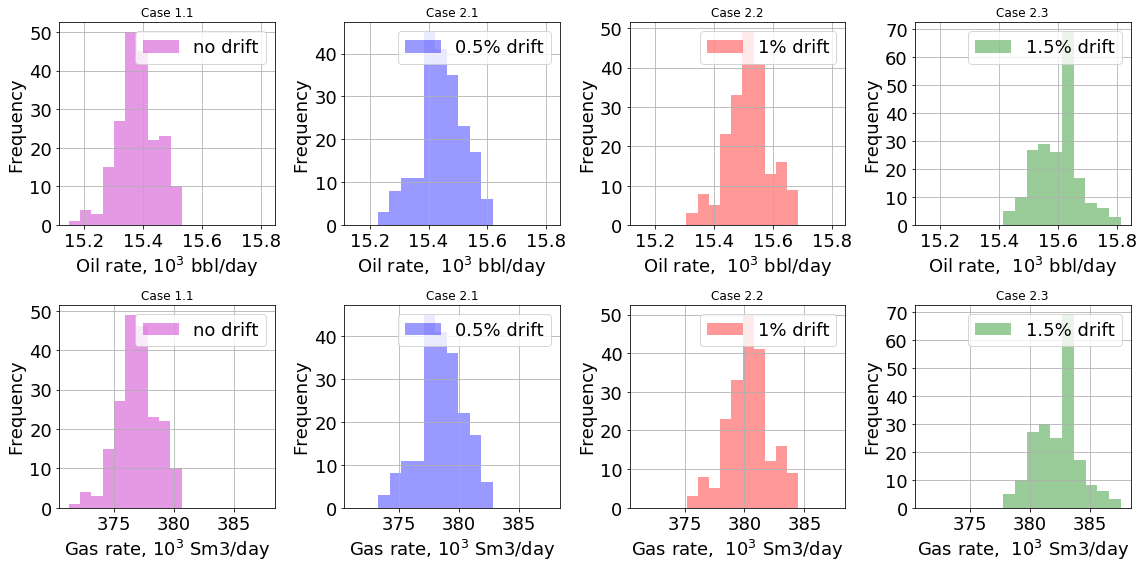

In [38]:
plt.figure(1, figsize = (16, 8))
tick_color_main = 'black'
tick_size = 18
scale = 1e-3

#Oil rates
ax2 = plt.subplot(2, 4, 1)
dist_plot(data_0_5_bbl_no*scale, 'no drift', 
          'Oil rate, $10^3$ bbl/day', 
          'Frequency', 'm', 
          tick_size, tick_color_main)
plt.title('Case 1.1')

plt.subplot(2, 4, 2, sharex=ax2)
dist_plot(data_0_5_bbl*scale, '0.5% drift', 
          'Oil rate,  $10^3$ bbl/day', 
          'Frequency', 'blue', 
          tick_size, tick_color_main)
plt.title('Case 2.1')

plt.subplot(2, 4, 3, sharex = ax2)
dist_plot(data_1_bbl*scale, '1% drift', 
          'Oil rate,  $10^3$ bbl/day', 
          'Frequency', 'red', 
          tick_size, tick_color_main)
plt.title('Case 2.2')

plt.subplot(2, 4, 4, sharex = ax2)
dist_plot(data_1_5_bbl*scale, '1.5% drift', 
          'Oil rate,  $10^3$ bbl/day', 
          'Frequency', 'green', 
          tick_size, tick_color_main)
plt.title('Case 2.3')

#Gas rates
ax1 = plt.subplot(2, 4, 5)
dist_plot(data_0_5_gas_no*scale, 'no drift', 
          'Gas rate, $10^3$ Sm3/day', 
          'Frequency', 'm', 
          tick_size, tick_color_main)
plt.title('Case 1.1')

plt.subplot(2, 4, 6, sharex=ax1)
dist_plot(data_0_5_gas*scale, '0.5% drift', 
          'Gas rate, $10^3$ Sm3/day', 
          'Frequency', 'blue', 
          tick_size, tick_color_main)
plt.title('Case 2.1')

plt.subplot(2, 4, 7, sharex=ax1)
dist_plot(data_1_gas*scale, '1% drift', 
          'Gas rate,  $10^3$ Sm3/day', 
          'Frequency', 'red', 
          tick_size, tick_color_main)
plt.title('Case 2.2')

plt.subplot(2, 4, 8, sharex=ax1)
dist_plot(data_1_5_gas*scale, '1.5% drift', 
          'Gas rate,  $10^3$ Sm3/day', 
          'Frequency', 'green', 
          tick_size, tick_color_main)
plt.title('Case 2.3')

In [39]:
#Oil rates in bbl
data_list_0_5_bbl = list(data_0_5_bbl['oil_rate_bbl'])
data_list_1_bbl = list(data_1_bbl['oil_rate_bbl'])
data_list_1_5_bbl = list(data_1_5_bbl['oil_rate_bbl'])
print (data_0_5_bbl['oil_rate_bbl'].mean())
print (data_1_bbl['oil_rate_bbl'].mean())

#Gas rates
data_list_0_5_gas = list(data_0_5_gas['gas_rate'])
data_list_1_gas = list(data_1_gas['gas_rate'])
data_list_1_5_gas = list(data_1_5_gas['gas_rate'])

15444.091248111681
15517.55368059655


Text(0.5, 1, 'Case 2.3 (1.5% drift)')

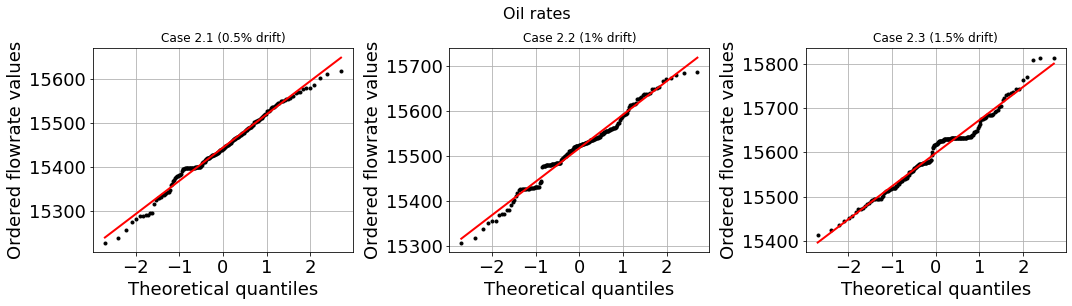

In [40]:
#Oil rates
plt.figure(2, figsize = (15, 4))
tick_color = 'black'
tick_size = 18
plt.suptitle('Oil rates', y=1.05, fontsize=16)

ax1 = plt.subplot(1, 3, 1)
Q_Q_plot(data_list_0_5_bbl, '0.5% error', 
         'Theoretical quantiles', 
         'Ordered flowrate values', 
         tick_size, tick_color_main)
ax1.get_lines()[0].set_marker('o')
ax1.get_lines()[0].set_markeredgecolor('k')
ax1.get_lines()[0].set_markerfacecolor('k')
ax1.get_lines()[1].set_linewidth(2.0)
ax1.get_lines()[0].set_markersize(3)
plt.title('Case 2.1 (0.5% drift)')

ax2 = plt.subplot(1, 3, 2, sharex = ax1)
Q_Q_plot(data_list_1_bbl, '1% error', 
         'Theoretical quantiles', 
         'Ordered flowrate values', 
         tick_size, tick_color_main)
ax2.get_lines()[0].set_marker('o')
ax2.get_lines()[0].set_markeredgecolor('k')
ax2.get_lines()[0].set_markerfacecolor('k')
ax2.get_lines()[1].set_linewidth(2.0)
ax2.get_lines()[0].set_markersize(3)
plt.title('Case 2.2 (1% drift)')

ax3 = plt.subplot(1, 3, 3, sharex = ax1)
Q_Q_plot(data_list_1_5_bbl, '1.5% error', 
         'Theoretical quantiles',
         'Ordered flowrate values', 
         tick_size, tick_color_main)
ax3.get_lines()[0].set_marker('o')
ax3.get_lines()[0].set_markeredgecolor('k')
ax3.get_lines()[0].set_markerfacecolor('k')
ax3.get_lines()[1].set_linewidth(2.0)
ax3.get_lines()[0].set_markersize(3)
plt.title('Case 2.3 (1.5% drift)')

Text(0.5, 1, 'Case 2.3 (1.5% drift)')

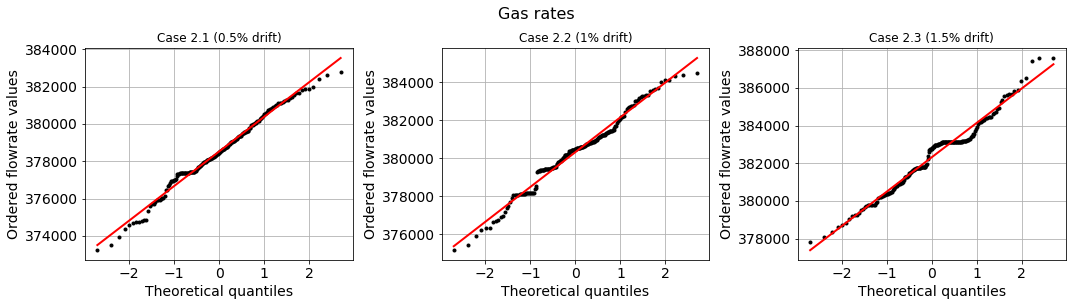

In [41]:
#Gas rates
plt.figure(2, figsize = (15, 4))
tick_color = 'black'
tick_size = 14
plt.suptitle('Gas rates', y = 1.05, fontsize=16)

ax1 = plt.subplot(1, 3, 1)
Q_Q_plot(data_list_0_5_gas, '0.5% error', 
         'Theoretical quantiles', 
         'Ordered flowrate values', 
         tick_size, tick_color_main)
ax1.get_lines()[0].set_marker('o')
ax1.get_lines()[0].set_markeredgecolor('k')
ax1.get_lines()[0].set_markerfacecolor('k')
ax1.get_lines()[1].set_linewidth(2.0)
ax1.get_lines()[0].set_markersize(3)
plt.title('Case 2.1 (0.5% drift)')

ax2 = plt.subplot(1, 3, 2, sharex = ax1)
Q_Q_plot(data_list_1_gas, '1% error', 'Theoretical quantiles', 
         'Ordered flowrate values', 
         tick_size, tick_color_main)
ax2.get_lines()[0].set_marker('o')
ax2.get_lines()[0].set_markeredgecolor('k')
ax2.get_lines()[0].set_markerfacecolor('k')
ax2.get_lines()[1].set_linewidth(2.0)
ax2.get_lines()[0].set_markersize(3)
plt.title('Case 2.2 (1% drift)')

ax3 = plt.subplot(1, 3, 3, sharex = ax1)
Q_Q_plot(data_list_1_5_gas, '1.5% error', 
         'Theoretical quantiles', 
         'Ordered flowrate values', 
         tick_size, tick_color_main)
ax3.get_lines()[0].set_marker('o')
ax3.get_lines()[0].set_markeredgecolor('k')
ax3.get_lines()[0].set_markerfacecolor('k')
ax3.get_lines()[1].set_linewidth(2.0)
ax3.get_lines()[0].set_markersize(3)
plt.title('Case 2.3 (1.5% drift)')

In [42]:
#Oil rate
print ("D’Agostino normality test, W-statistic: %f, p-value: %f" \
       %stats.normaltest(np.array(data_list_0_5_bbl)))
print ("D’Agostino normality test, W-statistic: %f, p-value: %f" \
       %stats.normaltest(np.array(data_list_1_bbl)))
print ("D’Agostino normality test, W-statistic: %f, p-value: %f" \
       %stats.normaltest(np.array(data_list_1_5_bbl)))

D’Agostino normality test, W-statistic: 1.888232, p-value: 0.389023
D’Agostino normality test, W-statistic: 1.419434, p-value: 0.491783
D’Agostino normality test, W-statistic: 1.052650, p-value: 0.590772


In [43]:
#Gas rate
print ("D’Agostino normality test, W-statistic: %f, p-value: %f" \
       %stats.normaltest(np.array(data_list_0_5_gas)))
print ("D’Agostino normality test, W-statistic: %f, p-value: %f" \
       %stats.normaltest(np.array(data_list_1_gas)))
print ("D’Agostino normality test, W-statistic: %f, p-value: %f" \
       %stats.normaltest(np.array(data_list_1_5_gas)))

D’Agostino normality test, W-statistic: 1.832536, p-value: 0.400009
D’Agostino normality test, W-statistic: 1.430515, p-value: 0.489066
D’Agostino normality test, W-statistic: 1.059472, p-value: 0.588760


### Compute means, standard deviations and total ranges

__Means__

In [44]:
print ('0.5% oil rate mean is', data_0_5_bbl.mean())
print ('1% oil rate mean is', data_1_bbl.mean())
print ('1.5% oil rate mean is', data_1_5_bbl.mean())

print ('0.5% gas rate mean is', data_0_5_gas.mean())
print ('1% gas rate mean is', data_1_gas.mean())
print ('1.5% gas rate mean is', data_1_5_gas.mean())

0.5% oil rate mean is oil_rate_bbl    15444.091248
dtype: float64
1% oil rate mean is oil_rate_bbl    15517.553681
dtype: float64
1.5% oil rate mean is oil_rate_bbl    15598.331875
dtype: float64
0.5% gas rate mean is gas_rate    378520.31193
dtype: float64
1% gas rate mean is gas_rate    380331.146698
dtype: float64
1.5% gas rate mean is gas_rate    382320.239986
dtype: float64


__Standard deviations__

In [45]:
print ('0.5% oil rate standard deviation is', np.std(data_0_5_bbl))
print ('1% oil rate standard deviation is', np.std(data_1_bbl))
print ('1.5% oil rate standard deviation is', np.std(data_1_5_bbl))

print ('0.5% gas rate standard deviation is', np.std(data_0_5_gas))
print ('1% gas rate standard deviation is', np.std(data_1_gas))
print ('1.5% gas rate standard deviation is', np.std(data_1_5_gas))

0.5% oil rate standard deviation is oil_rate_bbl    75.309645
dtype: float64
1% oil rate standard deviation is oil_rate_bbl    74.540601
dtype: float64
1.5% oil rate standard deviation is oil_rate_bbl    74.584542
dtype: float64
0.5% gas rate standard deviation is gas_rate    1846.541831
dtype: float64
1% gas rate standard deviation is gas_rate    1827.298116
dtype: float64
1.5% gas rate standard deviation is gas_rate    1829.322319
dtype: float64


__Total ranges__

In [46]:
print ('0.5% oil rate total range is', np.percentile(data_0_5_bbl, 100) - np.percentile(data_0_5_bbl, 0))
print ('1% oil rate total range is', np.percentile(data_1_bbl, 100) - np.percentile(data_1_bbl, 0))
print ('1.5% oil rate total range is', np.percentile(data_1_5_bbl, 100) - np.percentile(data_1_5_bbl, 0))

print ('0.5% gas rate total range is', np.percentile(data_0_5_gas, 100) - np.percentile(data_0_5_gas, 0))
print ('1% gas rate total range is', np.percentile(data_1_gas, 100) - np.percentile(data_1_gas, 0))
print ('1.5% gas rate total range is', np.percentile(data_1_5_gas, 100) - np.percentile(data_1_5_gas, 0))

0.5% oil rate total range is 390.38844804314067
1% oil rate total range is 380.51479431710504
1.5% oil rate total range is 399.6622080073339
0.5% gas rate total range is 9569.266045599012
1% gas rate total range is 9331.26166233787
1.5% gas rate total range is 9791.518572619418


__Means plots__

Text(0.5, 33.0, 'Oil rate,  $10^3$ bbl/day')

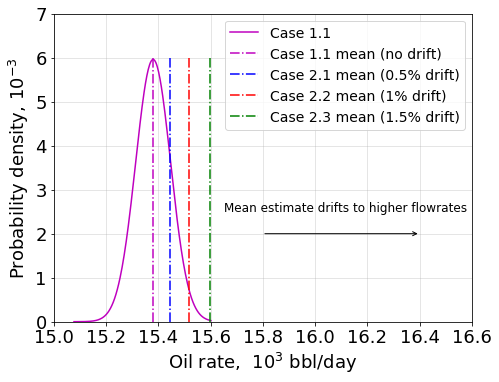

In [47]:
plt.figure(1, figsize = (8, 6))
tick_color_main = 'black'
tick_size = 18
fig_fontsize = 18
scale = 1e-3

# Case 1.1 

ax1 = plt.subplot(1, 1, 1)
x2 = np.array([np.mean(data_0_5_bbl_no)*scale, np.mean(data_0_5_bbl_no)*scale])
y2 = np.array([0, 6])

x3 = np.array([np.mean(data_0_5_bbl)*scale, np.mean(data_0_5_bbl)*scale])
y3 = np.array([0, 6])

x4 = np.array([np.mean(data_1_bbl)*scale, np.mean(data_1_bbl)*scale])
y4 = np.array([0, 6])

x5 = np.array([np.mean(data_1_5_bbl)*scale, np.mean(data_1_5_bbl)*scale])
y5 = np.array([0, 6])

#Oil rates
sns.distplot(data_0_5_bbl_no*scale, hist=False, 
             kde = False, fit=stats.norm, 
             fit_kws={'color': 'm'}, ax=ax1, 
             label='Case 1.1', color = 'm')
ax1.annotate("",
            xy=(16.4, 2), xycoords='data',
            xytext=(15.8, 2), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),)

ax1.annotate("Mean estimate drifts to higher flowrates",
            xy=(16.4, 2.5), xycoords='data',
            xytext=(15.65, 2.5), textcoords='data', fontsize=12)

plt.xlim((15, 16.6))
plt.ylim((0, 7))
plt.plot(x2, y2, linewidth=1.5, color='m', linestyle='-.', 
         label='Case 1.1 mean (no drift)')
plt.plot(x3, y3, linewidth=1.5, color='b', linestyle='-.', 
         label='Case 2.1 mean (0.5% drift)')
plt.plot(x4, y4, linewidth=1.5, color='r', linestyle='-.', 
         label='Case 2.2 mean (1% drift)')
plt.plot(x5, y5, linewidth=1.5, color='g', linestyle='-.', 
         label='Case 2.3 mean (1.5% drift)')
plt.yticks(fontsize=fig_fontsize, color=tick_color_main)
plt.ylabel('Probability density, $10^{-3}$',
           fontsize=fig_fontsize, color=tick_color_main)
plt.grid(True, alpha = 0.4)
plt.legend(fontsize = 14)
plt.tight_layout(5)
plt.xticks(fontsize = fig_fontsize, color=tick_color_main)
plt.xlabel('Oil rate,  $10^3$ bbl/day', fontsize=fig_fontsize, 
           color=tick_color_main)

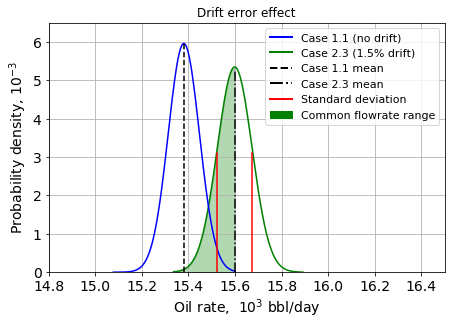

In [48]:
#Oil rates
fig_fontsize = 14
tick_color = 'k'

ax1 = plt.subplot(1, 1, 1)
sns.distplot(data_1_5_bbl*scale, bins=10, hist=False, 
             kde=False, fit=stats.norm, 
             fit_kws={'color': 'green'}, 
             color='green', label='Case 2.3', 
             ax=ax1)
plt.grid(True)
plt.tight_layout()
plt.xticks(fontsize=fig_fontsize, color=tick_color)
plt.xlabel('Oil rate,  $10^3$ bbl/day', 
           fontsize=fig_fontsize, color=tick_color)
plt.yticks(fontsize=fig_fontsize, color=tick_color)
plt.ylabel('Probability density, $10^{-3}$',
           fontsize=fig_fontsize, color=tick_color)

sns.distplot(data_0_5_bbl_no*scale, 
             bins=10, hist=False, kde=False,
             fit=stats.norm, 
             fit_kws = {'color': 'blue'}, 
             label='Case 1.1')
ax1.set_xlim(14.8, 16.5)
ax1.set_ylim(0, 6.5)

l1 = ax1.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax1.fill_between(x1,y1, color="green", alpha=0.3)

kde_x, kde_y = ax1.lines[0].get_data()
x0 = 15.08
x1 = 15.6
plt.fill_between(kde_x, kde_y, where=(kde_x<x0)| (kde_x>x1) , 
              interpolate=True, color='white', alpha=1)


x = [(np.mean(data_1_5_bbl) - np.std(data_1_5_bbl))*scale, 
     (np.mean(data_1_5_bbl) - np.std(data_1_5_bbl))*scale]
x1 = [(np.mean(data_1_5_bbl) + np.std(data_1_5_bbl))*scale, 
      (np.mean(data_1_5_bbl) + np.std(data_1_5_bbl))*scale]
y = [0, 3.1]
y1 = [0, 3.1]
plt.plot(x, y, color='r', label='Standard deviation')
plt.plot(x1, y1, color='r')

x = [np.mean(data_1_5_bbl)*scale, np.mean(data_1_5_bbl)*scale]
y = [0, 5.3]
plt.plot(x, y, linestyle='-.', color='k', label='Case 2.3 mean')

x = [np.mean(data_0_5_bbl_no)*scale, np.mean(data_0_5_bbl_no)*scale]
y = [0, 6]
plt.plot(x, y, linestyle='--', color='k', label='Case 1.1 mean')

legend_elements = [Line2D([0], [0], color='b', lw=2, label='Case 1.1 (no drift)'),
                   Line2D([0], [0], color='g', lw=2, label='Case 2.3 (1.5% drift)'),
                   Line2D([0], [0], color='k', linestyle = '--', lw=2, label='Case 1.1 mean'),
                   Line2D([0], [0], color='k', linestyle = '-.', lw=2, label='Case 2.3 mean'),
                   Line2D([0], [0], color='r', lw=2, label='Standard deviation'),
                   Patch(facecolor='g', edgecolor='g',label='Common flowrate range')]
plt.title('Drift error effect')

plt.legend(handles=legend_elements, loc="best", fontsize=11)

oil_rate_bbl    0.416619
dtype: float64
oil_rate_bbl    0.894268
dtype: float64
oil_rate_bbl    1.419483
dtype: float64


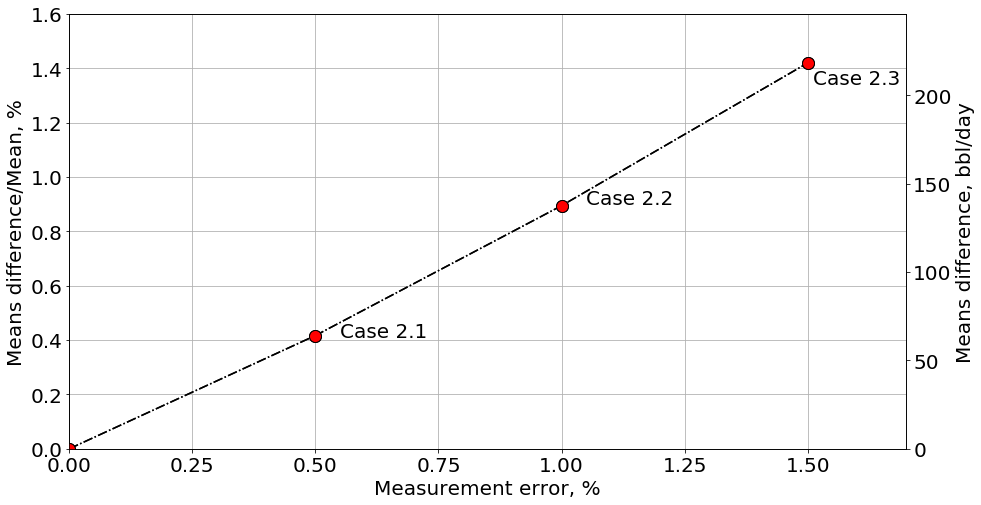

In [49]:
dif_1 =  data_0_5_bbl.mean() - data_0_5_bbl_no.mean()
dif_2 =  data_1_bbl.mean() - data_0_5_bbl_no.mean()
dif_3 =  data_1_5_bbl.mean() - data_0_5_bbl_no.mean()

x = [0, 0.5, 1.0, 1.5]
y = [0, dif_1, dif_2, dif_3]


y2 = [0, dif_1 *100/ data_0_5_bbl_no.mean(),
      dif_2*100/ data_0_5_bbl_no.mean(),
      dif_3*100/ data_0_5_bbl_no.mean()]

print  (dif_1*100/ data_0_5_bbl_no.mean())
print  (dif_2*100/ data_0_5_bbl_no.mean())
print  (dif_3*100/ data_0_5_bbl_no.mean())

fig, ax1 = plt.subplots(figsize=(15,8))
plt.grid(True, which='both')
color = 'black'
fontsize = 20

ax1.set_ylabel('Means difference/Mean, %', color=color, fontsize=fontsize)
ax1.set_xlabel('Measurement error, %', fontsize=fontsize)
ax1.set_ylim(0, 1.6)
ax1.set_xlim(0, 1.7)
x_major = np.arange(0, 1.75, 0.25)
ax1.set_xticks(x_major)
ax1.plot(x, y2, linestyle='-.', color='k', marker='o', 
         markerfacecolor='r', markersize=12)
ax1.tick_params(axis='x', labelcolor=color, labelsize=fontsize )
ax1.tick_params(axis='y', labelcolor=color, labelsize=fontsize)

ax1.annotate('Case 2.1', xy=(0.5, 0.41), xytext=(0.55, 0.41), fontsize=20)
ax1.annotate('Case 2.2', xy=(1, 0.9), xytext=(1.05, 0.9), fontsize=20)
ax1.annotate('Case 2.3', xy=(1.5, 1.34), xytext=(1.51, 1.34), fontsize=20)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 246)
ax2.set_xlabel('Measurement error, %', fontsize=fontsize)
ax2.set_ylabel('Means difference, bbl/day', color=color, fontsize=fontsize)
ax2.plot(x, y, linestyle='-.', color='k', 
         marker='o', markerfacecolor='r', 
         markersize=12)
ax2.tick_params(axis='y', labelcolor=color, labelsize=fontsize )
ax2.tick_params(axis='x', labelcolor=color, labelsize=fontsize )

__Means and std comparison__

__Means__

In [50]:
#Oil
print ('Mean difference 1 oil is', data_0_5_bbl.mean() - data_0_5_bbl_no.mean())
print ('Mean difference 2 oil is', data_1_bbl.mean() - data_0_5_bbl_no.mean())
print ('Mean difference 3 oil is', data_1_5_bbl.mean() - data_0_5_bbl_no.mean())

#Gas
print ('Mean difference 1 gas is', data_0_5_gas.mean() - data_0_5_gas_no.mean())
print ('Mean difference 2 gas is', data_1_gas.mean() - data_0_5_gas_no.mean())
print ('Mean difference 3 gas is', data_1_5_gas.mean() - data_0_5_gas_no.mean())

Mean difference 1 oil is oil_rate_bbl    64.076095
dtype: float64
Mean difference 2 oil is oil_rate_bbl    137.538527
dtype: float64
Mean difference 3 oil is oil_rate_bbl    218.316722
dtype: float64
Mean difference 1 gas is gas_rate    1579.512765
dtype: float64
Mean difference 2 gas is gas_rate    3390.347533
dtype: float64
Mean difference 3 gas is gas_rate    5379.440822
dtype: float64


In [51]:
# Oil
print ('Confidence interval of the oil mean difference is', \
       DescrStatsW(data_0_5_bbl.values - data_0_5_bbl_no.values).tconfint_mean())
print ('Confidence interval of the oil mean difference is', \
       DescrStatsW(data_1_bbl.values - data_0_5_bbl_no.values).tconfint_mean())
print ('Confidence interval of the oil mean difference is', \
       DescrStatsW(data_1_5_bbl.values - data_0_5_bbl_no.values).tconfint_mean())

# Gas
print ('Confidence interval of the gas mean difference is', \
       DescrStatsW(data_0_5_gas.values - data_0_5_gas_no.values).tconfint_mean())
print ('Confidence interval of the gas mean difference is', \
       DescrStatsW(data_1_gas.values - data_0_5_gas_no.values).tconfint_mean())
print ('Confidence interval of the gas mean difference is', \
       DescrStatsW(data_1_5_gas.values - data_0_5_gas_no.values).tconfint_mean())

Confidence interval of the oil mean difference is (array([52.40767186]), array([75.74451751]))
Confidence interval of the oil mean difference is (array([126.676589]), array([148.40046534]))
Confidence interval of the oil mean difference is (array([203.88878825]), array([232.74465503]))
Confidence interval of the gas mean difference is (array([1293.63406987]), array([1865.39146048]))
Confidence interval of the gas mean difference is (array([3124.13479331]), array([3656.56027327]))
Confidence interval of the gas mean difference is (array([5025.66501541]), array([5733.21662785]))


In [52]:
#Oil
print ('t-test on means', ttest_rel(data_0_5_bbl, data_0_5_bbl_no))
print ('t-test on means', ttest_rel(data_1_bbl, data_0_5_bbl_no))
print ('t-test on means', ttest_rel(data_1_5_bbl, data_0_5_bbl_no))

print (float(data_1_bbl.mean()) / float(data_0_5_bbl.mean()))
print (float(data_1_5_bbl.mean()) / float(data_0_5_bbl.mean())) 

t-test on means Ttest_relResult(statistic=array([10.82882204]), pvalue=array([8.807077e-22]))
t-test on means Ttest_relResult(statistic=array([24.96976088]), pvalue=array([3.1036314e-63]))
t-test on means Ttest_relResult(statistic=array([29.83872162]), pvalue=array([2.15297107e-75]))
1.0047566691561636
1.009987031575848


In [53]:
#Gas
print ('t-test on means', ttest_rel(data_0_5_gas, data_0_5_gas_no))
print ('t-test on means', ttest_rel(data_1_gas, data_0_5_gas_no))
print ('t-test on means', ttest_rel(data_1_5_gas, data_0_5_gas_no))

print (float(data_1_gas.mean()) / float(data_0_5_gas.mean()))
print (float(data_1_5_gas.mean()) / float(data_0_5_gas.mean())) 

t-test on means Ttest_relResult(statistic=array([10.89528735]), pvalue=array([5.57660185e-22]))
t-test on means Ttest_relResult(statistic=array([25.11381689]), pvalue=array([1.29978771e-63]))
t-test on means Ttest_relResult(statistic=array([29.98515824]), pvalue=array([9.69478356e-76]))
1.0047839830810739
1.0100389013130646


__Stds__

In [54]:
#Oil
print ('std difference is', np.std(data_0_5_bbl) - np.std(data_0_5_bbl_no))
print ('std difference is', np.std(data_1_bbl) - np.std(data_0_5_bbl_no))
print ('std difference is', np.std(data_1_5_bbl) - np.std(data_0_5_bbl_no))

std difference is oil_rate_bbl    8.374136
dtype: float64
std difference is oil_rate_bbl    7.605092
dtype: float64
std difference is oil_rate_bbl    7.649033
dtype: float64


In [55]:
#Gas
print ('std difference is', np.std(data_0_5_gas) - np.std(data_0_5_gas_no))
print ('std difference is', np.std(data_1_gas) - np.std(data_0_5_gas_no))
print ('std difference is', np.std(data_1_5_gas) - np.std(data_0_5_gas_no))

std difference is gas_rate    206.405028
dtype: float64
std difference is gas_rate    187.161313
dtype: float64
std difference is gas_rate    189.185516
dtype: float64


__Total range__

In [56]:
total_0_5_bbl_no = np.percentile(data_0_5_bbl_no, 100) - np.percentile(data_0_5_bbl_no, 0)
total_0_5_bbl = np.percentile(data_0_5_bbl, 100) - np.percentile(data_0_5_bbl, 0)
total_1_bbl = np.percentile(data_1_bbl, 100) - np.percentile(data_1_bbl, 0)
total_1_5_bbl = np.percentile(data_1_5_bbl, 100) - np.percentile(data_1_5_bbl, 0)

print ('Total range difference oil 0.5-0.5 is', total_0_5_bbl - total_0_5_bbl_no)
print ('Total range difference oil 1-0.5 is', total_1_bbl - total_0_5_bbl_no)
print ('Total range difference oil 1.5-0.5 is', total_1_5_bbl - total_0_5_bbl_no)

total_0_5_gas_no = np.percentile(data_0_5_gas_no, 100) - np.percentile(data_0_5_gas_no, 0)
total_0_5_gas = np.percentile(data_0_5_gas, 100) - np.percentile(data_0_5_gas, 0)
total_1_gas = np.percentile(data_1_gas, 100) - np.percentile(data_1_gas, 0)
total_1_5_gas = np.percentile(data_1_5_gas, 100) - np.percentile(data_1_5_gas, 0)

print ('Total range difference gas 0.5-0.5 is', total_0_5_gas - total_0_5_gas_no)
print ('Total range difference gas 1-0.5 is', total_1_gas - total_0_5_gas_no)
print ('Total range difference gas 1.5-0.5 is', total_1_5_gas - total_0_5_gas_no)

Total range difference oil 0.5-0.5 is 6.056419053236823
Total range difference oil 1-0.5 is -3.8172346727988042
Total range difference oil 1.5-0.5 is 15.330179017430055
Total range difference gas 0.5-0.5 is 150.32750424934784
Total range difference gas 1-0.5 is -87.67687901179306
Total range difference gas 1.5-0.5 is 372.5800312697538


__Variance difference__

In [59]:
print (stats.bartlett(data_0_5_bbl.values.ravel(), data_0_5_bbl_no.values.ravel()))
print (stats.bartlett(data_1_bbl.values.ravel(), data_0_5_bbl_no.values.ravel()))
print (stats.bartlett(data_1_5_bbl.values.ravel(), data_0_5_bbl_no.values.ravel()))

print (stats.bartlett(data_0_5_gas.values.ravel(), data_0_5_gas_no.values.ravel()))
print (stats.bartlett(data_1_gas.values.ravel(), data_0_5_gas_no.values.ravel()))
print (stats.bartlett(data_1_5_gas.values.ravel(), data_0_5_gas_no.values.ravel()))

BartlettResult(statistic=0.30400990204561185, pvalue=0.5813794244944437)
BartlettResult(statistic=2.294389617488339, pvalue=0.12984224524756474)
BartlettResult(statistic=2.319538412778035, pvalue=0.12775793230593355)
BartlettResult(statistic=0.3191209254563179, pvalue=0.5721364160455082)
BartlettResult(statistic=2.3133428624328545, pvalue=0.1282679333862023)
BartlettResult(statistic=2.3608953853642576, pvalue=0.12441076287426728)


# Sensor failure

In [60]:
#Data with 0.5% error
data_mat = scipy.io.loadmat('Paper_0_5_percent_42_bar_Normal_dist_200.mat')
data_0_5_bbl_no = pd.DataFrame(data_mat['oil_rate_bbl'], columns = ['oil_rate_bbl'])
data_0_5_gas_no = pd.DataFrame(data_mat['gas_rate'], columns = ['gas_rate'])

#Data with sensor failure
data_mat = scipy.io.loadmat('Paper_0_5_percent_No_temp_42_bar_Normal_dist_200.mat')
data_0_5_bbl = pd.DataFrame(data_mat['oil_rate_bbl'], columns = ['oil_rate_bbl'])
data_0_5_gas = pd.DataFrame(data_mat['gas_rate'], columns = ['gas_rate'])

#Data with sensor failure and temperature drop
data_mat = scipy.io.loadmat('Paper_0_5_percent_No_temp_with_drop_42_bar_Normal_dist_200.mat')
data_0_5_bbl_drop = pd.DataFrame(data_mat['oil_rate_bbl'], columns = ['oil_rate_bbl'])
data_0_5_gas_drop = pd.DataFrame(data_mat['gas_rate'], columns = ['gas_rate'])

C:\Users\timurb\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\timurb\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\timurb\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\timurb\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1.

Text(0.5, 1, '5% drop of actual temperature')

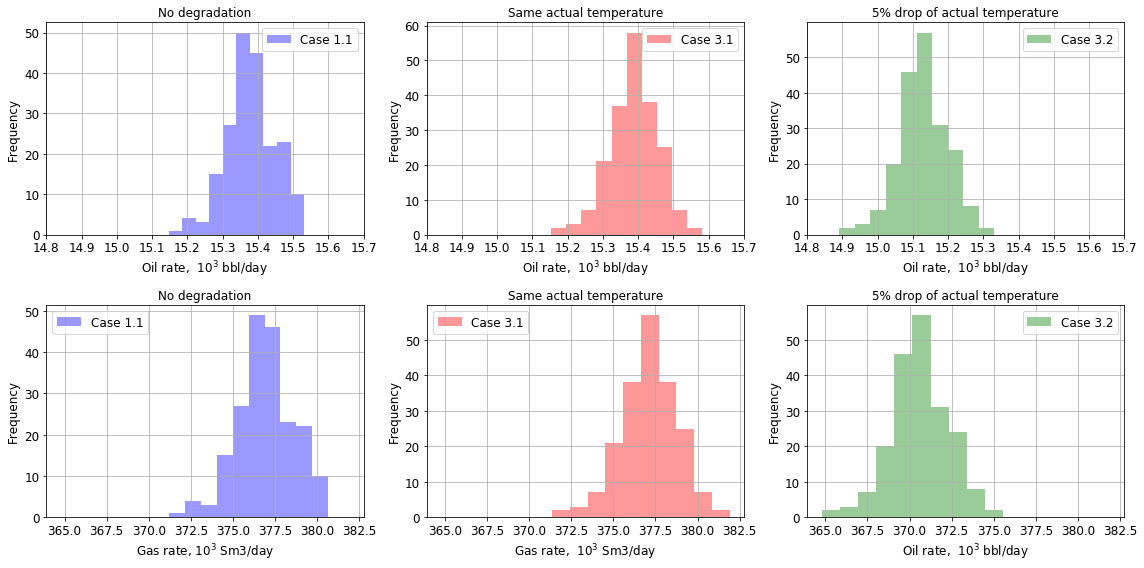

In [61]:
plt.figure(1, figsize = (16, 8))
tick_color_main = 'black'
tick_color = 'black'
tick_size = 12
fig_fontsize = 12
scale = 1e-3

#Oil rates
ax2 = plt.subplot(2, 3, 1)
dist_plot(data_0_5_bbl_no*scale, 'Case 1.1', 'Oil rate,  $10^3$ bbl/day', 
          'Frequency', 'blue', tick_size, tick_color_main)
plt.title('No degradation')

plt.subplot(2, 3, 2, sharex = ax2)
dist_plot(data_0_5_bbl*scale, 'Case 3.1', 'Oil rate,  $10^3$ bbl/day', 
          'Frequency', 'red', tick_size, tick_color_main)
plt.title('Same actual temperature')

plt.subplot(2, 3, 3, sharex = ax2)
dist_plot(data_0_5_bbl_drop*scale, 'Case 3.2', 'Oil rate,  $10^3$ bbl/day', 
          'Frequency', 'green', tick_size, tick_color_main)
plt.title('5% drop of actual temperature')
plt.xlim(14.8, 15.7)


#Gas rates
ax1 = plt.subplot(2, 3, 4)
dist_plot(data_0_5_gas_no*scale, 'Case 1.1', 
          'Gas rate, $10^3$ Sm3/day', 
          'Frequency', 'blue', 
          tick_size, tick_color_main)
plt.title('No degradation')

plt.subplot(2, 3, 5, sharex = ax1)
dist_plot(data_0_5_gas*scale, 'Case 3.1', 
          'Gas rate,  $10^3$ Sm3/day', 
          'Frequency', 'red', 
          tick_size, tick_color_main)
plt.tight_layout()
plt.title('Same actual temperature')

plt.subplot(2, 3, 6, sharex = ax1)
dist_plot(data_0_5_gas_drop*scale, 'Case 3.2', 'Oil rate,  $10^3$ bbl/day', 
          'Frequency', 'green', tick_size, tick_color_main)
plt.title('5% drop of actual temperature')

In [62]:
#Oil rates in bbl
data_list_0_5_bbl_no = list(data_0_5_bbl_no['oil_rate_bbl'])
data_list_0_5_bbl = list(data_0_5_bbl['oil_rate_bbl'])
data_list_0_5_bbl_drop = list(data_0_5_bbl_drop['oil_rate_bbl'])

#Gas rates
data_list_0_5_gas_no = list(data_0_5_gas_no['gas_rate'])
data_list_0_5_gas = list(data_0_5_gas['gas_rate'])
data_list_0_5_gas_drop = list(data_0_5_gas_drop['gas_rate'])

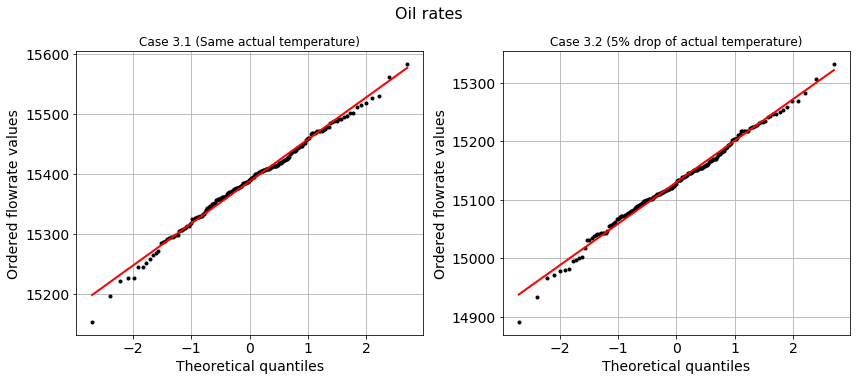

In [63]:
#Oil rates
plt.figure(2, figsize = (12, 5))
tick_color = 'black'
tick_size = 14
plt.suptitle('Oil rates', y = 1.05, fontsize=16)

ax1 = plt.subplot(1, 2, 1)
Q_Q_plot(data_list_0_5_bbl, '0.5% error', 'Theoretical quantiles', 'Ordered flowrate values', tick_size, tick_color_main)
ax1.get_lines()[0].set_marker('o')
ax1.get_lines()[0].set_markeredgecolor('k')
ax1.get_lines()[0].set_markerfacecolor('k')
ax1.get_lines()[1].set_linewidth(2.0)
ax1.get_lines()[0].set_markersize(3)
plt.title('Case 3.1 (Same actual temperature)')

ax2 = plt.subplot(1, 2, 2, sharex = ax1)
Q_Q_plot(data_list_0_5_bbl_drop, '0.5% error', 'Theoretical quantiles', 'Ordered flowrate values', tick_size, tick_color_main)
ax2.get_lines()[0].set_marker('o')
ax2.get_lines()[0].set_markeredgecolor('k')
ax2.get_lines()[0].set_markerfacecolor('k')
ax2.get_lines()[1].set_linewidth(2.0)
ax2.get_lines()[0].set_markersize(3)
plt.title('Case 3.2 (5% drop of actual temperature)')
plt.tight_layout()

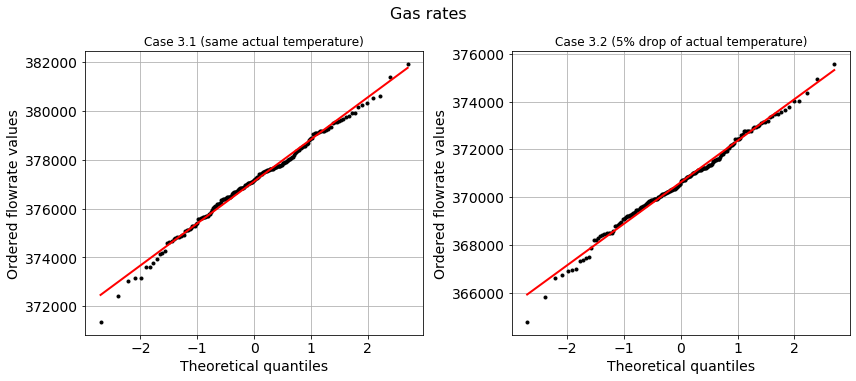

In [64]:
#Oil rates
plt.figure(2, figsize = (12, 5))
tick_color = 'black'
tick_size = 14
plt.suptitle('Gas rates', y = 1.05, fontsize=16)

ax1 = plt.subplot(1, 2, 1)
Q_Q_plot(data_list_0_5_gas, '0.5% error', 
         'Theoretical quantiles', 
         'Ordered flowrate values', 
         tick_size, tick_color_main)

ax1.get_lines()[0].set_marker('o')
ax1.get_lines()[0].set_markeredgecolor('k')
ax1.get_lines()[0].set_markerfacecolor('k')
ax1.get_lines()[1].set_linewidth(2.0)
ax1.get_lines()[0].set_markersize(3)
plt.title('Case 3.1 (same actual temperature)')

ax2 = plt.subplot(1, 2, 2, sharex = ax1)
Q_Q_plot(data_list_0_5_gas_drop, '0.5% error', 
         'Theoretical quantiles', 'Ordered flowrate values', 
         tick_size, tick_color_main)
ax2.get_lines()[0].set_marker('o')
ax2.get_lines()[0].set_markeredgecolor('k')
ax2.get_lines()[0].set_markerfacecolor('k')
ax2.get_lines()[1].set_linewidth(2.0)
ax2.get_lines()[0].set_markersize(3)
plt.title('Case 3.2 (5% drop of actual temperature)')
plt.tight_layout()

In [65]:
#Oil rate
print ("D’Agostino normality test, W-statistic: %f, p-value: %f" \
       %stats.normaltest(np.array(data_list_0_5_bbl)))
print ("D’Agostino normality test, W-statistic: %f, p-value: %f" \
       %stats.normaltest(np.array(data_list_0_5_bbl_drop)))
print ("D’Agostino normality test, W-statistic: %f, p-value: %f" \
       %stats.normaltest(np.array(data_list_0_5_gas)))
print ("D’Agostino normality test, W-statistic: %f, p-value: %f" \
       %stats.normaltest(np.array(data_list_0_5_gas_drop)))

D’Agostino normality test, W-statistic: 3.676778, p-value: 0.159073
D’Agostino normality test, W-statistic: 2.838467, p-value: 0.241899
D’Agostino normality test, W-statistic: 3.723713, p-value: 0.155384
D’Agostino normality test, W-statistic: 2.849183, p-value: 0.240607


In [66]:
print ('0.5% oil rate mean is', data_0_5_bbl.mean())
print ('0.5% oil rate mean is', data_0_5_bbl_drop.mean())

print ('0.5% gas rate mean is', data_0_5_gas.mean())
print ('0.5% gas rate mean is', data_0_5_gas_drop.mean())

0.5% oil rate mean is oil_rate_bbl    15386.914294
dtype: float64
0.5% oil rate mean is oil_rate_bbl    15129.719288
dtype: float64
0.5% gas rate mean is gas_rate    377109.602634
dtype: float64
0.5% gas rate mean is gas_rate    370621.844462
dtype: float64


In [67]:
print ('0.5% oil mean difference is', data_0_5_bbl_no.mean() - data_0_5_bbl.mean())
print ('0.5% oil mean difference is', data_0_5_bbl_no.mean() - data_0_5_bbl_drop.mean())

print ('0.5% gas mean difference is', data_0_5_gas_no.mean() - data_0_5_gas.mean())
print ('0.5% gas mean difference is', data_0_5_gas_no.mean() - data_0_5_gas_drop.mean())

0.5% oil mean difference is oil_rate_bbl   -6.899141
dtype: float64
0.5% oil mean difference is oil_rate_bbl    250.295865
dtype: float64
0.5% gas mean difference is gas_rate   -168.803469
dtype: float64
0.5% gas mean difference is gas_rate    6318.954703
dtype: float64


In [68]:
print ('0.5% oil rate standard deviation is', np.std(data_0_5_bbl))
print ('0.5% oil rate standard deviation is', np.std(data_0_5_bbl_drop))

print ('0.5% gas rate standard deviation is', np.std(data_0_5_gas))
print ('0.5% gas rate standard deviation is', np.std(data_0_5_gas_drop))

0.5% oil rate standard deviation is oil_rate_bbl    69.607291
dtype: float64
0.5% oil rate standard deviation is oil_rate_bbl    70.462329
dtype: float64
0.5% gas rate standard deviation is gas_rate    1707.24432
dtype: float64
0.5% gas rate standard deviation is gas_rate    1727.534601
dtype: float64


In [69]:
#Oil
print ('std difference is', np.std(data_0_5_bbl) - np.std(data_0_5_bbl_no))
print ('std difference is', np.std(data_0_5_bbl_drop) - np.std(data_0_5_bbl_no))

#Gas
print ('std difference is', np.std(data_0_5_gas) - np.std(data_0_5_gas_no))
print ('std difference is', np.std(data_0_5_gas_drop) - np.std(data_0_5_gas_no))

std difference is oil_rate_bbl    2.671782
dtype: float64
std difference is oil_rate_bbl    3.52682
dtype: float64
std difference is gas_rate    67.107517
dtype: float64
std difference is gas_rate    87.397798
dtype: float64


In [70]:
print ('0.5% oil rate total range is', np.percentile(data_0_5_bbl, 100) \
       - np.percentile(data_0_5_bbl, 0))
print ('0.5% gas rate total range is', np.percentile(data_0_5_gas, 100) \
       - np.percentile(data_0_5_gas, 0))

print ('0.5% oil rate total range is', np.percentile(data_0_5_bbl_drop, 100) \
       - np.percentile(data_0_5_bbl_drop, 0))
print ('0.5% gas rate total range is', np.percentile(data_0_5_gas_drop, 100) \
       - np.percentile(data_0_5_gas_drop, 0))

0.5% oil rate total range is 429.3748599475275
0.5% gas rate total range is 10537.068889101152
0.5% oil rate total range is 440.0024420007321
0.5% gas rate total range is 10786.841949815338


In [71]:
total_0_5_bbl_no = np.percentile(data_0_5_bbl_no, 100) \
                   - np.percentile(data_0_5_bbl_no, 0)
total_0_5_bbl = np.percentile(data_0_5_bbl, 100) \
                - np.percentile(data_0_5_bbl, 0)
total_0_5_bbl_drop = np.percentile(data_0_5_bbl_drop, 100) \
                      - np.percentile(data_0_5_bbl_drop, 0)

print ('Total range difference oil 0.5-0.5 is', total_0_5_bbl - total_0_5_bbl_no)
print ('Total range difference oil 1-0.5 is', total_0_5_bbl_drop - total_0_5_bbl_no)

total_0_5_gas_no = np.percentile(data_0_5_gas_no, 100) \
                   - np.percentile(data_0_5_gas_no, 0)
total_0_5_gas = np.percentile(data_0_5_gas, 100) \
                - np.percentile(data_0_5_gas, 0)
total_0_5_gas_drop = np.percentile(data_0_5_gas_drop, 100) \
                   - np.percentile(data_0_5_gas_drop, 0)

print ('Total range difference gas 0.5-0.5 is', total_0_5_gas - total_0_5_gas_no)
print ('Total range difference gas 1-0.5 is', total_0_5_gas_drop - total_0_5_gas_no)

Total range difference oil 0.5-0.5 is 45.042830957623664
Total range difference oil 1-0.5 is 55.67041301082827
Total range difference gas 0.5-0.5 is 1118.1303477514884
Total range difference gas 1-0.5 is 1367.9034084656741


In [72]:
print ('t-test on means', ttest_rel(data_0_5_bbl, data_0_5_bbl_no))
print ('t-test on means', ttest_rel(data_0_5_gas, data_0_5_gas_no))

print ('t-test on means', ttest_rel(data_0_5_bbl_drop, data_0_5_bbl_no))
print ('t-test on means', ttest_rel(data_0_5_gas_drop, data_0_5_gas_no))

t-test on means Ttest_relResult(statistic=array([1.28418358]), pvalue=array([0.20057078]))
t-test on means Ttest_relResult(statistic=array([1.28240229]), pvalue=array([0.20119337]))
t-test on means Ttest_relResult(statistic=array([-35.59951198]), pvalue=array([3.014847e-88]))
t-test on means Ttest_relResult(statistic=array([-36.67010773]), pvalue=array([1.80127186e-90]))


In [74]:
print (stats.bartlett(data_0_5_bbl.values.ravel(), data_0_5_bbl_no.values.ravel()))
print (stats.bartlett(data_0_5_bbl_drop.values.ravel(), data_0_5_bbl_no.values.ravel()))

print (stats.bartlett(data_0_5_gas.values.ravel(), data_0_5_gas_no.values.ravel()))
print (stats.bartlett(data_0_5_gas_drop.values.ravel(), data_0_5_gas_no.values.ravel()))

BartlettResult(statistic=0.30400990204561185, pvalue=0.5813794244944437)
BartlettResult(statistic=0.5231547542382037, pvalue=0.46949904734054937)
BartlettResult(statistic=0.3191209254563179, pvalue=0.5721364160455082)
BartlettResult(statistic=0.5347673387598281, pvalue=0.4646094383115743)


# Heat transfer modelling

In [75]:
data_mat = scipy.io.loadmat('Multi-heat-flowrate_150_200.mat')
data_multi_bbl = pd.DataFrame(data_mat['oil_rate_bbl'], columns = ['oil_rate_bbl'])
data_multi_gas = pd.DataFrame(data_mat['gas_rate'], columns = ['gas_rate'])

data_mat = scipy.io.loadmat('Mono-heat-flowrate_200_new.mat')
data_mono_bbl = pd.DataFrame(data_mat['oil_rate_bbl'], columns = ['oil_rate_bbl'])
data_mono_gas = pd.DataFrame(data_mat['gas_rate'], columns = ['gas_rate'])

C:\Users\timurb\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\timurb\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\timurb\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\timurb\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1.

Text(0.5, 1, 'Single heat transfer coefficient')

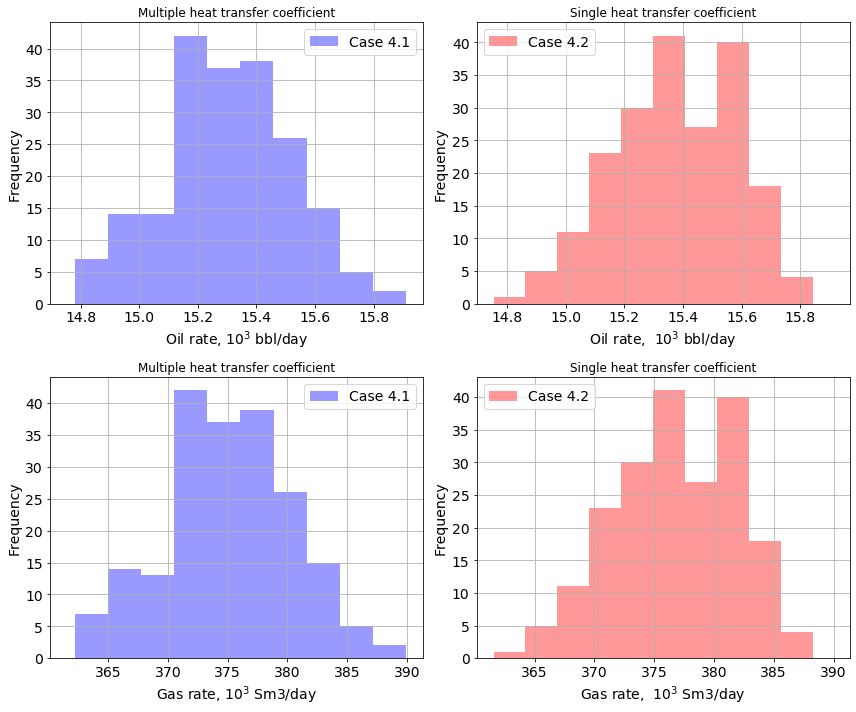

In [76]:
plt.figure(1, figsize = (12, 10))
fig_fontsize = 14
tick_color_main = 'black'
tick_size = 14
tick_color = 'black'
scale = 1e-3

#Oil rates
ax2 = plt.subplot(2, 2, 1)
dist_plot(data_multi_bbl*scale, 'Case 4.1', 
          'Oil rate, $10^3$ bbl/day', 
          'Frequency', 'blue', 
          tick_size, tick_color_main)
plt.title('Multiple heat transfer coefficient')

plt.subplot(2, 2, 2, sharex = ax2)
dist_plot(data_mono_bbl*scale, 'Case 4.2', 
          'Oil rate,  $10^3$ bbl/day', 
          'Frequency', 'red', 
          tick_size, tick_color_main)
plt.title('Single heat transfer coefficient')

#Gas rates
ax1 = plt.subplot(2, 2, 3)
dist_plot(data_multi_gas*scale, 'Case 4.1', 
          'Gas rate, $10^3$ Sm3/day', 'Frequency', 
          'blue', tick_size, tick_color_main)
plt.title('Multiple heat transfer coefficient')

plt.subplot(2, 2, 4, sharex = ax1)
dist_plot(data_mono_gas*scale, 'Case 4.2', 
          'Gas rate,  $10^3$ Sm3/day', 
          'Frequency', 'red', 
          tick_size, tick_color_main)
plt.title('Single heat transfer coefficient')

In [77]:
#Oil rates in bbl
data_list_multi_bbl = list(data_multi_bbl['oil_rate_bbl'])
data_list_mono_bbl = list(data_mono_bbl['oil_rate_bbl'])

#Gas rates
data_list_multi_gas = list(data_multi_gas['gas_rate'])
data_list_mono_gas = list(data_mono_gas['gas_rate'])

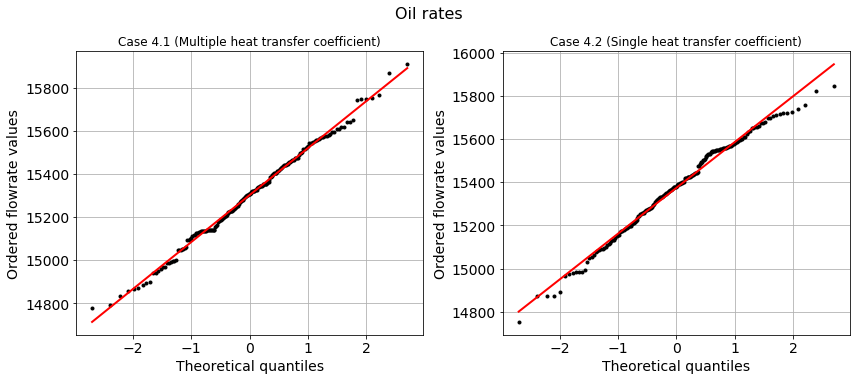

In [78]:
#Oil rates
plt.figure(2, figsize = (12, 5))
tick_color = 'black'
tick_size = 14
plt.suptitle('Oil rates', y = 1.05, fontsize=16)

ax1 = plt.subplot(1, 2, 1)
Q_Q_plot(data_list_multi_bbl, '0.5% error', 
         'Theoretical quantiles', 
         'Ordered flowrate values', 
         tick_size, tick_color_main)
ax1.get_lines()[0].set_marker('o')
ax1.get_lines()[0].set_markeredgecolor('k')
ax1.get_lines()[0].set_markerfacecolor('k')
ax1.get_lines()[1].set_linewidth(2.0)
ax1.get_lines()[0].set_markersize(3)
plt.title('Case 4.1 (Multiple heat transfer coefficient)')

ax2 = plt.subplot(1, 2, 2, sharex = ax1)
Q_Q_plot(data_list_mono_bbl, '0.5% error', 
         'Theoretical quantiles', 
         'Ordered flowrate values', 
         tick_size, tick_color_main)
ax2.get_lines()[0].set_marker('o')
ax2.get_lines()[0].set_markeredgecolor('k')
ax2.get_lines()[0].set_markerfacecolor('k')
ax2.get_lines()[1].set_linewidth(2.0)
ax2.get_lines()[0].set_markersize(3)
plt.title('Case 4.2 (Single heat transfer coefficient)')
plt.tight_layout()

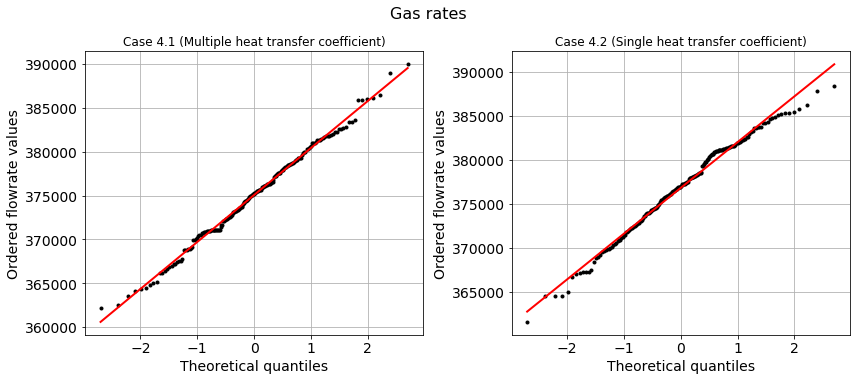

In [79]:
#Oil rates
plt.figure(2, figsize = (12, 5))
tick_color = 'black'
tick_size = 14
plt.suptitle('Gas rates', y = 1.05, fontsize=16)

ax1 = plt.subplot(1, 2, 1)
Q_Q_plot(data_list_multi_gas, '0.5% error', 'Theoretical quantiles', 'Ordered flowrate values', tick_size, tick_color_main)
ax1.get_lines()[0].set_marker('o')
ax1.get_lines()[0].set_markeredgecolor('k')
ax1.get_lines()[0].set_markerfacecolor('k')
ax1.get_lines()[1].set_linewidth(2.0)
ax1.get_lines()[0].set_markersize(3)
plt.title('Case 4.1 (Multiple heat transfer coefficient)')

ax2 = plt.subplot(1, 2, 2, sharex = ax1)
Q_Q_plot(data_list_mono_gas, '0.5% error', 'Theoretical quantiles', 'Ordered flowrate values', tick_size, tick_color_main)
ax2.get_lines()[0].set_marker('o')
ax2.get_lines()[0].set_markeredgecolor('k')
ax2.get_lines()[0].set_markerfacecolor('k')
ax2.get_lines()[1].set_linewidth(2.0)
ax2.get_lines()[0].set_markersize(3)
plt.title('Case 4.2 (Single heat transfer coefficient)')
plt.tight_layout()

In [80]:
print ("D’Agostino normality test, W-statistic: %f, p-value: %f" \
       %stats.normaltest(data_multi_bbl))
print ("D’Agostino normality test, W-statistic: %f, p-value: %f" \
       %stats.normaltest(data_mono_bbl))

print ("D’Agostino normality test, W-statistic: %f, p-value: %f" \
       %stats.normaltest(data_multi_gas))
print ("D’Agostino normality test, W-statistic: %f, p-value: %f" \
       %stats.normaltest(data_mono_gas))

D’Agostino normality test, W-statistic: 0.168453, p-value: 0.919223
D’Agostino normality test, W-statistic: 4.015339, p-value: 0.134301
D’Agostino normality test, W-statistic: 0.173542, p-value: 0.916887
D’Agostino normality test, W-statistic: 4.030180, p-value: 0.133308


In [81]:
print ('0.5% oil rate mean is', data_multi_bbl.mean())
print ('0.5% oil rate mean is', data_mono_bbl.mean())

print ('0.5% gas rate mean is', data_mono_gas.mean())
print ('0.5% gas rate mean is', data_multi_gas.mean())

0.5% oil rate mean is oil_rate_bbl    15303.336322
dtype: float64
0.5% oil rate mean is oil_rate_bbl    15373.772098
dtype: float64
0.5% gas rate mean is gas_rate    376779.136542
dtype: float64
0.5% gas rate mean is gas_rate    375060.342419
dtype: float64


In [82]:
print ('0.5% oil mean difference is', data_multi_bbl.mean() - data_mono_bbl.mean())
print ('0.5% gas mean difference is',data_multi_gas.mean() - data_mono_gas.mean())

0.5% oil mean difference is oil_rate_bbl   -70.435776
dtype: float64
0.5% gas mean difference is gas_rate   -1718.794123
dtype: float64


In [83]:
print ('0.5% oil rate standard deviation is', np.std(data_multi_bbl))
print ('0.5% oil rate standard deviation is', np.std(data_mono_bbl))

print ('0.5% gas rate standard deviation is', np.std(data_multi_gas))
print ('0.5% gas rate standard deviation is', np.std(data_mono_gas))

0.5% oil rate standard deviation is oil_rate_bbl    216.141708
dtype: float64
0.5% oil rate standard deviation is oil_rate_bbl    210.960622
dtype: float64
0.5% gas rate standard deviation is gas_rate    5297.55335
dtype: float64
0.5% gas rate standard deviation is gas_rate    5172.29431
dtype: float64


In [84]:
#Oil
print ('std difference is', np.std(data_multi_bbl) - np.std(data_mono_bbl))

#Gas
print ('std difference is', np.std(data_multi_gas) - np.std(data_mono_gas))

std difference is oil_rate_bbl    5.181086
dtype: float64
std difference is gas_rate    125.259039
dtype: float64


In [85]:
print ('0.5% oil rate total range is', np.percentile(data_multi_bbl, 100) \
       - np.percentile(data_multi_bbl, 0))
print ('0.5% gas rate total range is', np.percentile(data_multi_gas, 100) \
       - np.percentile(data_multi_gas, 0))

print ('0.5% oil rate total range is', np.percentile(data_mono_bbl, 100) \
       - np.percentile(data_mono_bbl, 0))
print ('0.5% gas rate total range is', np.percentile(data_mono_gas, 100) \
       - np.percentile(data_mono_gas, 0))

0.5% oil rate total range is 1131.1274107863355
0.5% gas rate total range is 27715.523175280134
0.5% oil rate total range is 1091.3267591495242
0.5% gas rate total range is 26752.47260078753


In [86]:
total_multi_bbl = np.percentile(data_multi_bbl, 100) - np.percentile(data_multi_bbl, 0)
total_mono_bbl = np.percentile(data_mono_bbl, 100) - np.percentile(data_mono_bbl, 0)
print ('Total range difference oil 0.5-0.5 is', total_multi_bbl - total_mono_bbl)

total_multi_gas = np.percentile(data_multi_gas, 100) - np.percentile(data_multi_gas, 0)
total_mono_gas = np.percentile(data_mono_gas, 100) - np.percentile(data_mono_gas, 0)
print ('Total range difference gas 0.5-0.5 is', total_multi_gas - total_mono_gas)

Total range difference oil 0.5-0.5 is 39.80065163681138
Total range difference gas 0.5-0.5 is 963.0505744926049


In [87]:
print ('t-test on means', ttest_rel(data_multi_bbl, data_mono_bbl))
print ('t-test on means', ttest_rel(data_multi_gas, data_mono_gas))

t-test on means Ttest_relResult(statistic=array([-3.57182384]), pvalue=array([0.0004446]))
t-test on means Ttest_relResult(statistic=array([-3.55546647]), pvalue=array([0.00047142]))


In [89]:
print (stats.bartlett(data_multi_bbl.values.ravel(), data_mono_bbl.values.ravel()))
print (stats.bartlett(data_multi_gas.values.ravel(), data_mono_gas.values.ravel()))

BartlettResult(statistic=0.11684251762843152, pvalue=0.7324845902290082)
BartlettResult(statistic=0.11364770627593421, pvalue=0.7360288875611916)
